<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Emerging Trend in Data Science </h1><h2>Assignment 2</h2><h2>Student name:Marissa Leong Sue Yui</h2><h2>Student ID:S10241629D</h2></th>
    </tr>
</table>

## Objectives
To assess students' ability to research and apply different eXplainable AI (XAI) techniques to explain the outcome/prediction of a machine learning model.

### Scope
This is an individual assignment. The assignment consists of a single classification problem to be solved. Students are to use at least one XAI technique to provide an explanation to the derived outcome/prediction/target of the unseen test samples. Students are to use the provided Jupyter notebook and build their solution. The assignment exposes the students to be able to explain why their machine learning model is producing the outcome.

In [1]:
# Import your necessary libraries
# import the required packages

import numpy as np
import pandas as pd

# sklearn preprocess
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer

# feature engine
import feature_engine.imputation as mdi
from feature_engine.variable_handling import check_numerical_variables
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, RareLabelEncoder
from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, StandardScaler, RobustScaler
from feature_engine.transformation import LogTransformer
from feature_engine.imputation import MeanMedianImputer
from sklearn.metrics import confusion_matrix, accuracy_score
from math import sqrt
from feature_engine.outliers import Winsorizer

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

Load Test Set

In [2]:
# Load your dataset
df_test = pd.read_csv('test.csv')
df_test.head()

x0  x1  x2  x3  x4  x5    x6  x7  x8  x9  x10  x11   x12  x13  x14  x15  \
0   1  28   6   1   2   0  1646   1   1   2   26    8   714    0    0    0   
1   2  33   1   1   0   0  2172   1   0   2   26    8  1053   11    0    0   
2   3  38   0   1   1   0  4901   0   0   2   26    8   415    0    0    0   
3   4  23   9   1   1   0  1467   1   0   2   26    8   360    0    0    0   
4   5  28   4   0   1   0  1990   1   1   2   26    8   595   11    0    0   

   x16  
0    3  
1    3  
2    3  
3    3  
4    3

Load Train Set
- x - features
- y - target

In [3]:
# Load your dataset
df = pd.read_csv('train.csv')
df.head(10)

x0  x1  x2  x3  x4  x5    x6  x7  x8  x9  x10  x11   x12  x13  x14  x15  \
0   1  32   1   0   0   0  4439   0   0   0   26    3  1245    0    0    0   
1   2  21   9   1   1   0  7156   0   0   0   26    3   674    0  156    1   
2   3  20   4   2   2   0  2294   0   0   0   26    3    13   22    0    0   
3   4  18   9   0   1   0  3909   0   0   1   26    3   953    0    0    0   
4   5  17   4   2   2   0  3351   0   0   0   26    3  1241    0    0    0   
5   6  29   1   0   1   0  2289   1   0   0   26    3    55    0  169   30   
6   7  11   0   1   1   0  5263   0   1   0   26    3   946    0  109   12   
7   8  13   8   2   1   0  4748   0   0   0   26    3   284   33    0    0   
8   9  13   0   2   1   0  5552   1   0   0   26    3  1507    0    0    0   
9  10  19   4   2   2   0  1939   0   0   0   26    3  1242    1    0    0   

   x16  y  
0    3  0  
1    0  0  
2    3  0  
3    3  0  
4    3  1  
5    0  0  
6    0  0  
7    3  0  
8    3  0  
9    3  0

#### Exploratory Data Analysis (EDA)

Goal: Understand the distribution and relationships of the features with respect to the target

- Dataset overview & basic statistics

In [4]:
# Understand number of rows (observations) & columns (features) in the dataset
# Size & Structure
# (15000 rows of data, 18 columns)

df.shape

(15000, 18)

In [5]:
# Understand the dataset by showing number of records per column
# #: Column Index
# Column: Column Name (17 Features, 1 Target Column)
# Non-Null Count: Number of 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x0      15000 non-null  int64
 1   x1      15000 non-null  int64
 2   x2      15000 non-null  int64
 3   x3      15000 non-null  int64
 4   x4      15000 non-null  int64
 5   x5      15000 non-null  int64
 6   x6      15000 non-null  int64
 7   x7      15000 non-null  int64
 8   x8      15000 non-null  int64
 9   x9      15000 non-null  int64
 10  x10     15000 non-null  int64
 11  x11     15000 non-null  int64
 12  x12     15000 non-null  int64
 13  x13     15000 non-null  int64
 14  x14     15000 non-null  int64
 15  x15     15000 non-null  int64
 16  x16     15000 non-null  int64
 17  y       15000 non-null  int64
dtypes: int64(18)
memory usage: 2.1 MB


In [6]:
# Statistical Summary of the Dataframe: Summarizes the Central Tendancy & Data Spread
# Observations: 
# x0 is column index
# x3, x5, x8 is binary

df.describe().T

count         mean          std  min      25%     50%       75%  \
x0   15000.0  7500.500000  4330.271354  1.0  3750.75  7500.5  11250.25   
x1   15000.0    22.509400    12.620142  0.0    13.00    19.0     30.00   
x2   15000.0     4.315467     3.252054  0.0     1.00     4.0      7.00   
x3   15000.0     1.246800     0.628158  0.0     1.00     1.0      2.00   
x4   15000.0     1.264933     0.744120  0.0     1.00     1.0      2.00   
x5   15000.0     0.007000     0.083375  0.0     0.00     0.0      0.00   
x6   15000.0  3548.346000  2036.223742  0.0  1739.00  3395.0   5351.00   
x7   15000.0     0.568600     0.495288  0.0     0.00     1.0      1.00   
x8   15000.0     0.108667     0.311231  0.0     0.00     0.0      0.00   
x9   15000.0     0.123733     0.377403  0.0     0.00     0.0      0.00   
x10  15000.0    14.440133     9.857110  0.0     5.00    12.0     26.00   
x11  15000.0     5.345600     3.593803  0.0     1.00     7.0      8.00   
x12  15000.0   766.589000   374.435273  0.0   529.00   748.0   1005.00   
x13  15000.0    10.565933    13.194779  0.0     0.00    11.0     13.00   
x14  15000.0   110.050133   165.795786  0.0     0.00     0.0    217.00   
x15  15000.0     6.469600    11.305715  0.0     0.00     0.0     12.00   
x16  15000.0     1.978000     1.280739  0.0     1.00     3.0      3.00   
y    15000.0     0.250333     0.433219  0.0     0.00     0.0      1.00   

         max  
x0   15000.0  
x1      76.0  
x2      11.0  
x3       2.0  
x4       3.0  
x5       1.0  
x6    7165.0  
x7       1.0  
x8       1.0  
x9       2.0  
x10     30.0  
x11     11.0  
x12   1570.0  
x13     47.0  
x14    558.0  
x15     40.0  
x16      3.0  
y        1.0

In [7]:
# Check how many unique values exist in each column - data variety

df.nunique()

x0     15000
x1        77
x2        12
x3         3
x4         4
x5         2
x6      4250
x7         2
x8         2
x9         3
x10       31
x11       12
x12     1192
x13       22
x14      555
x15       39
x16        4
y          2
dtype: int64

- Target Distribution Analysis

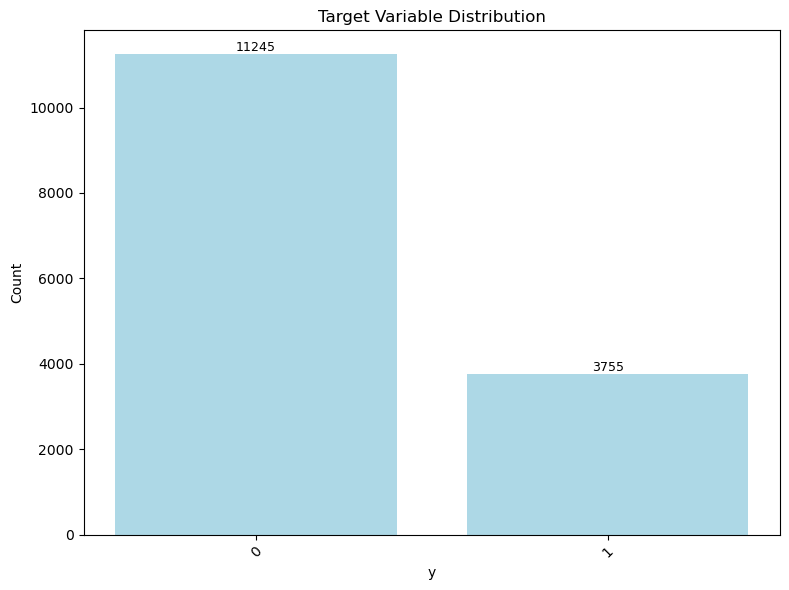

In [8]:
counts = df['y'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index.astype(str), counts.values, color='lightblue')
plt.title('Target Variable Distribution')
plt.xlabel('y')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=9)

plt.show()

Target Variable (y):

The plot for y (the target) reveals the class balance between class 0 and 1. It can be seen that class 0 has significantly more samples than class 1, revealing that the dataset is imbalanced. This would affect model performance if not handled correctly.


In [9]:
# Check class balance
class_ratio = min(df['y'].value_counts()) / max(df['y'].value_counts())
print(f"Class balance ratio: {class_ratio:.3f}")

Class balance ratio: 0.334


In [10]:
# Correlation Analysis of Target to Other Features

for cols in df.columns:
    correlation = df[cols].corr(df['y'])
    print (f'{cols}: ', correlation)

x0:  0.2904443800581995
x1:  0.08002306462484131
x2:  0.08595853327339577
x3:  0.0321597741396294
x4:  0.1102699325121387
x5:  -0.024521849006735028
x6:  0.03597652678037572
x7:  -0.30173981863150523
x8:  -0.08655509305638315
x9:  -0.04510794591411514
x10:  0.012401218247355485
x11:  -0.013606015787169048
x12:  0.07064544933737442
x13:  -0.08626392928974072
x14:  0.0890134525377404
x15:  0.07003058219865205
x16:  0.06399978377465353
y:  0.9999999999999999


The correlation list between the target variable (y) and other features does not indicate any strong relationships, suggesting that none of the individual features are highly predictive of the target on their own. 

- Feature Distribution & Relationships

In [11]:
# Check how many unique values exist in each column - data variety

df.nunique()

x0     15000
x1        77
x2        12
x3         3
x4         4
x5         2
x6      4250
x7         2
x8         2
x9         3
x10       31
x11       12
x12     1192
x13       22
x14      555
x15       39
x16        4
y          2
dtype: int64

- Binary Features:

We can see that x5, x7, x8 are binary (only 2 unique values) which is typical for categorical or indicator variables.

In [12]:
# x0 was dropped from X as it is just the row number

y = df['y']
X = df.drop(['x0','y'], axis=1)

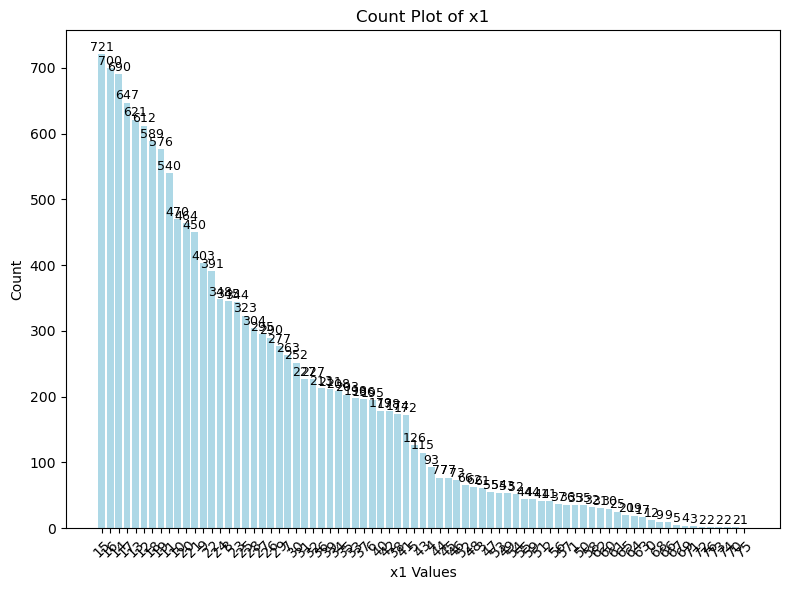

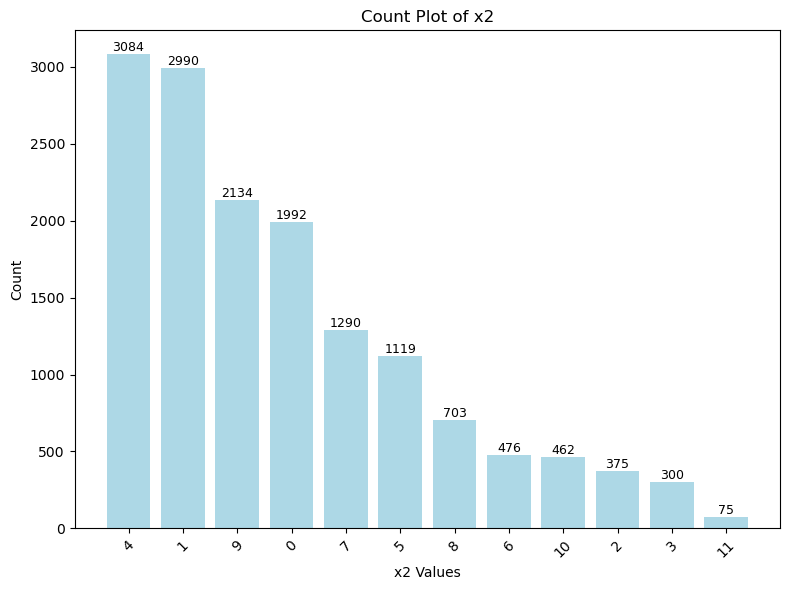

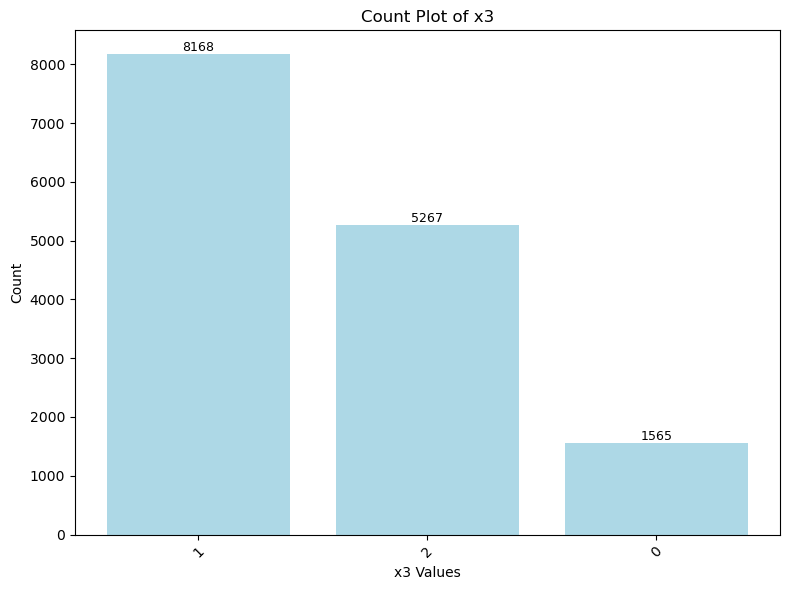

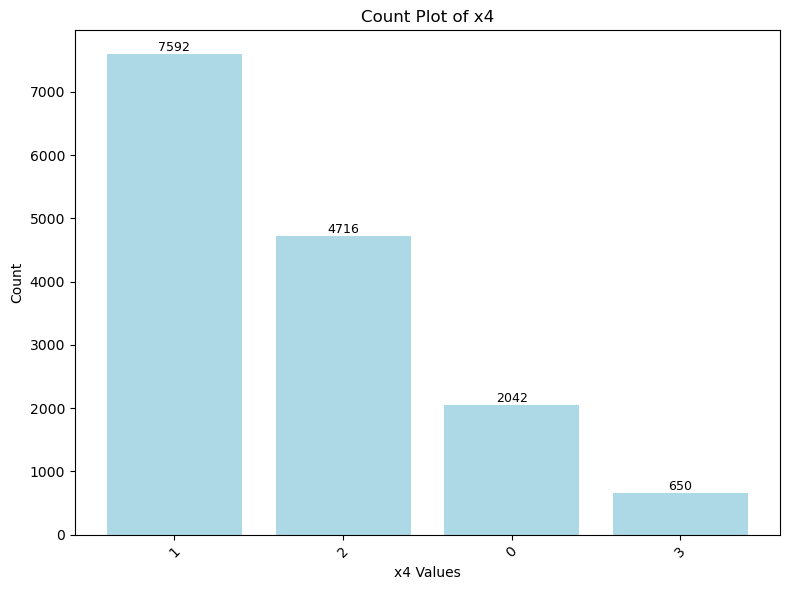

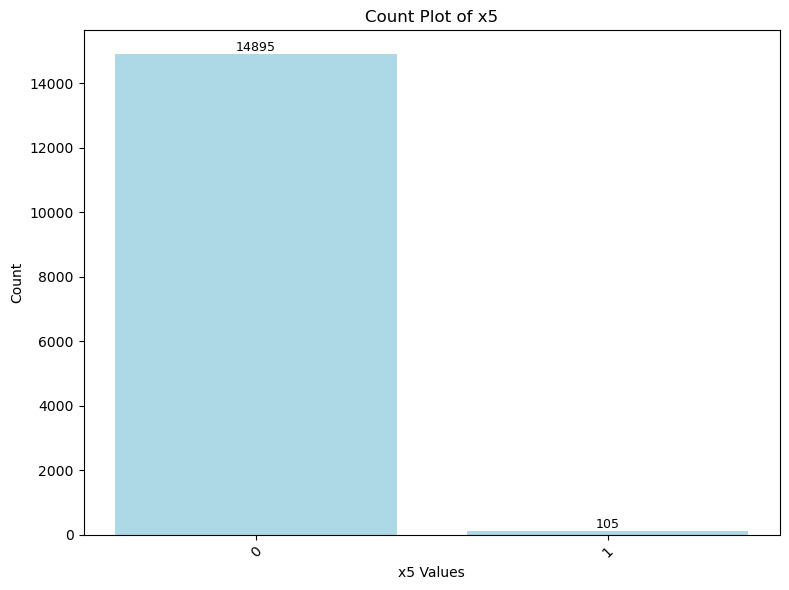

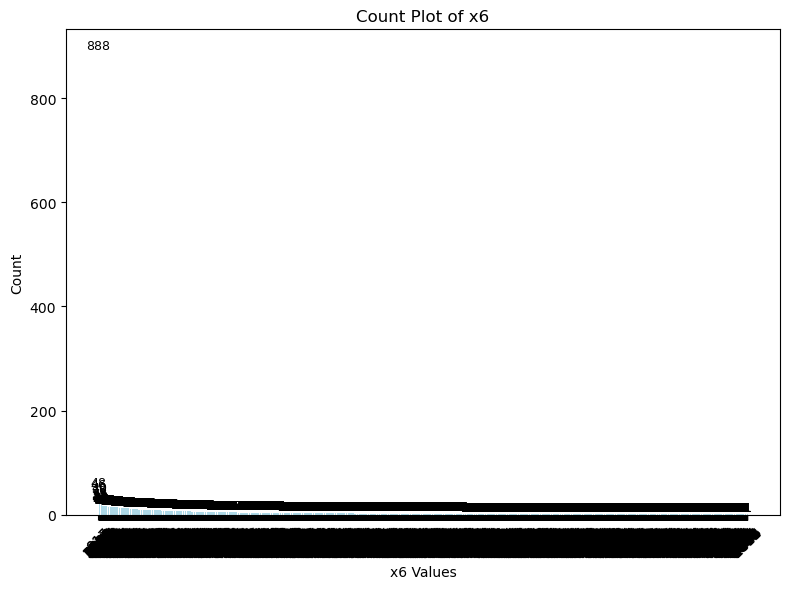

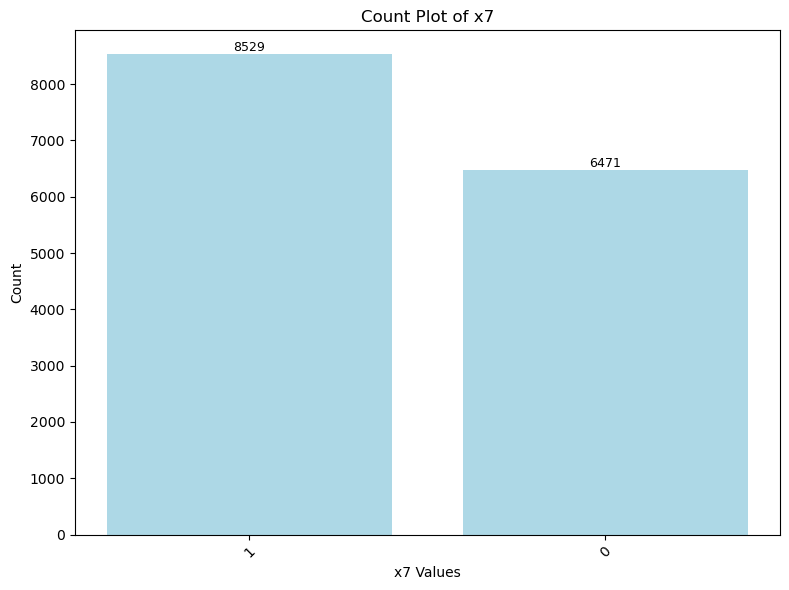

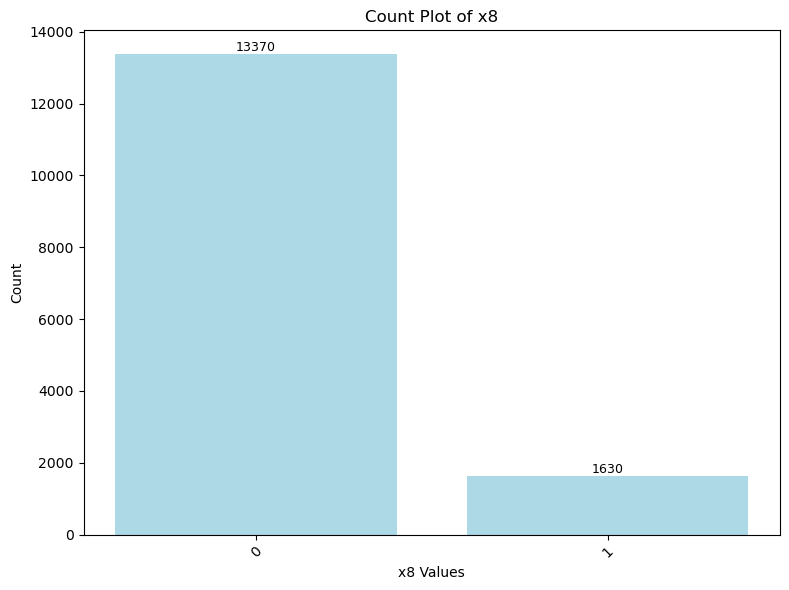

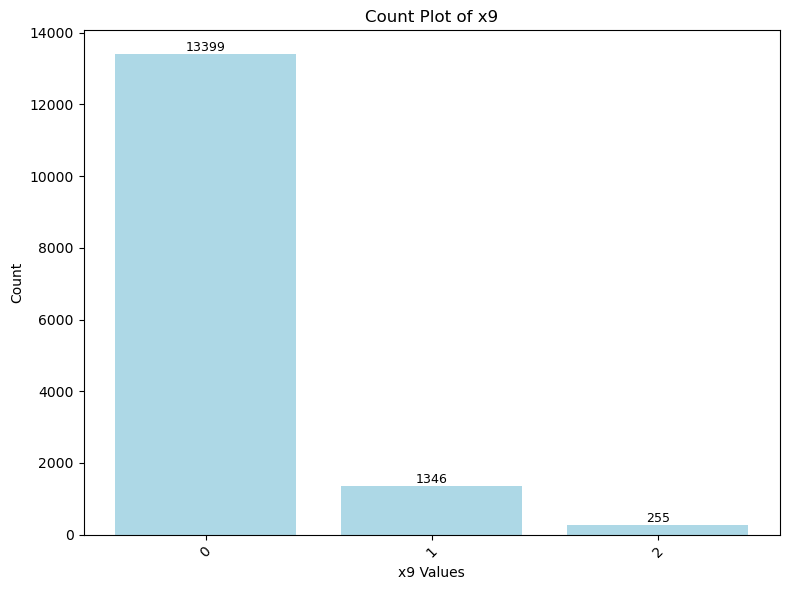

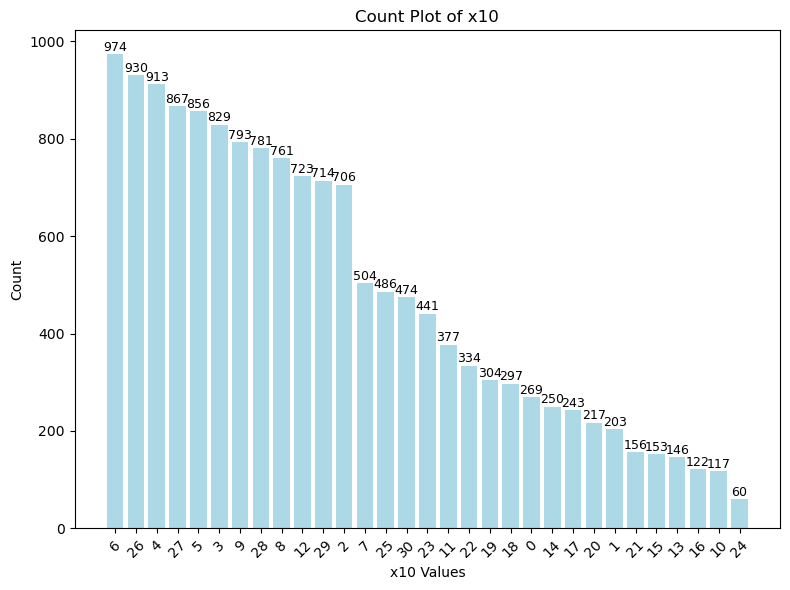

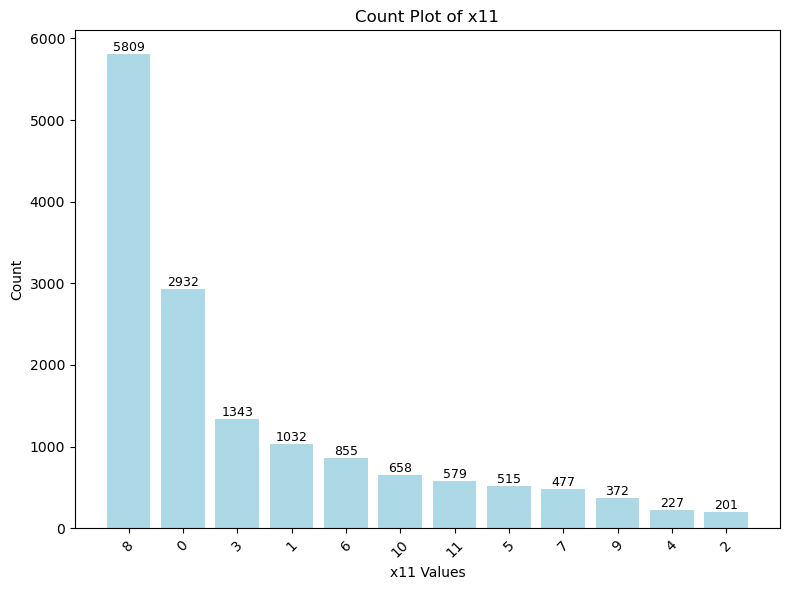

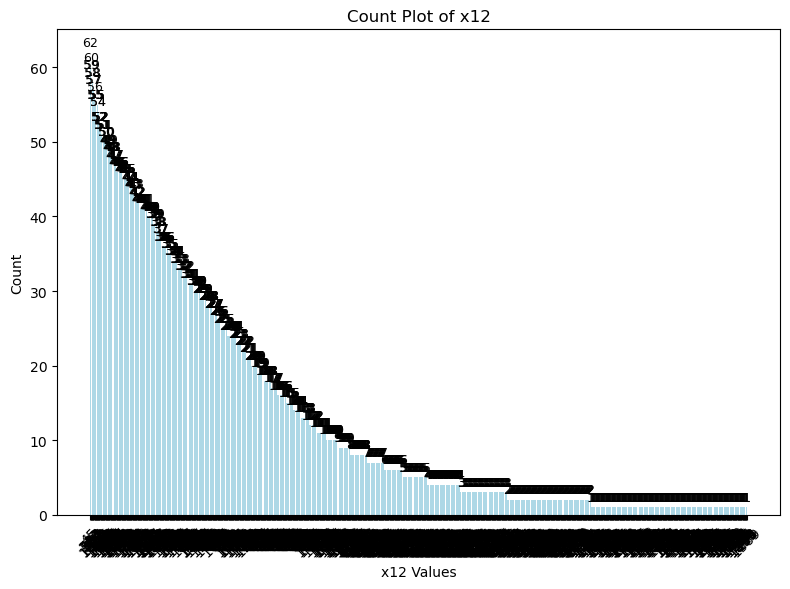

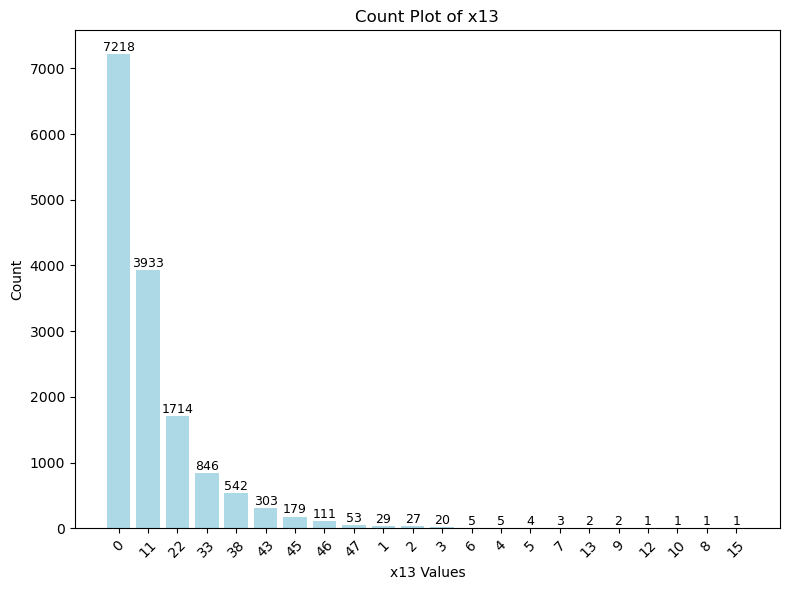

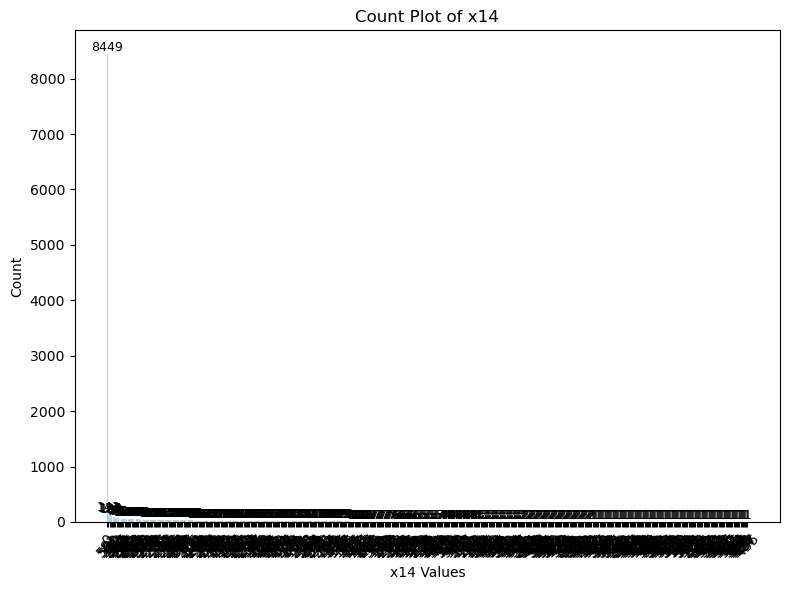

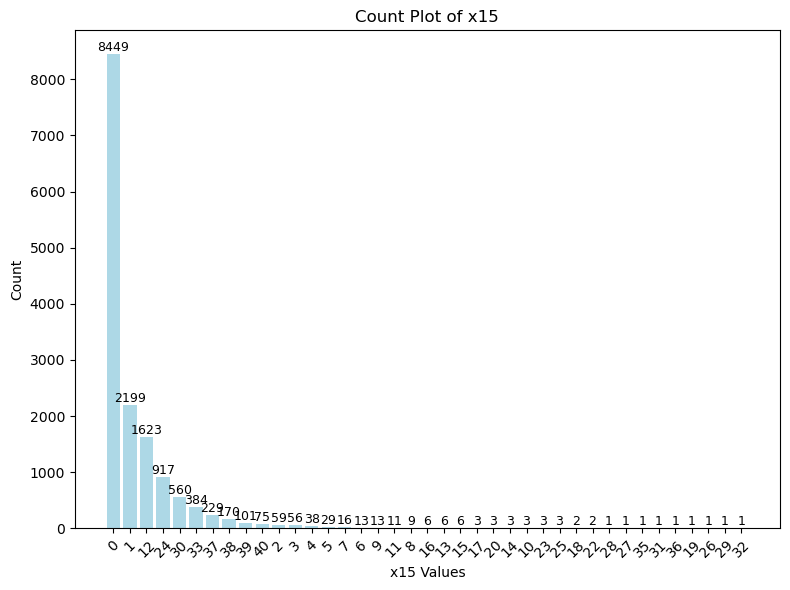

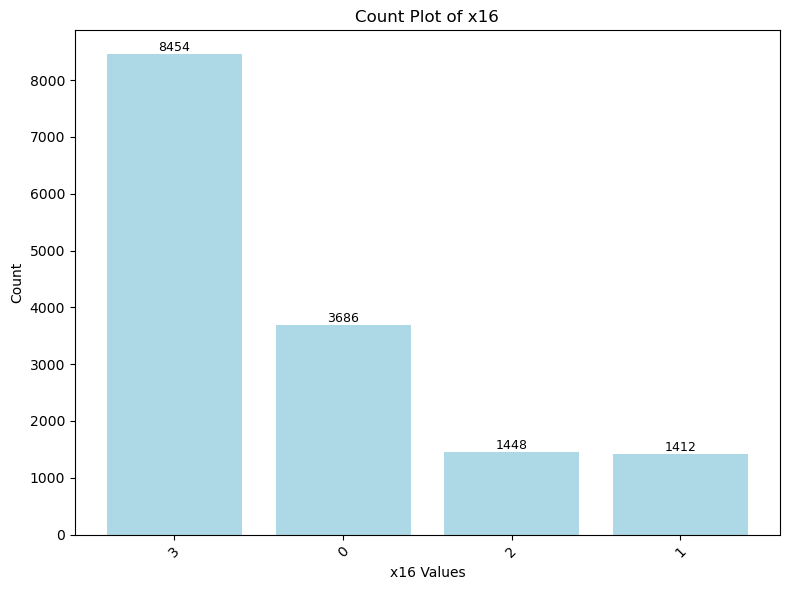

In [13]:
# Feature distributions

for column in X:
    counts = df[column].value_counts()

    plt.figure(figsize=(8, 6))
    bars = plt.bar(counts.index.astype(str), counts.values, color='lightblue')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(f'{column} Values')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Annotate each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
                 ha='center', va='bottom', fontsize=9)

    plt.show()


Feature Distribution:

The count plots show how values are distributed for each feature. Some features have a balanced distribution (e.g.x7), while others are skewed or have dominant values (e.g. x9, x14)

Several features show clustering around specific values, which may signal thresholds important to the model.

- Correlation Analysis

<Axes: >

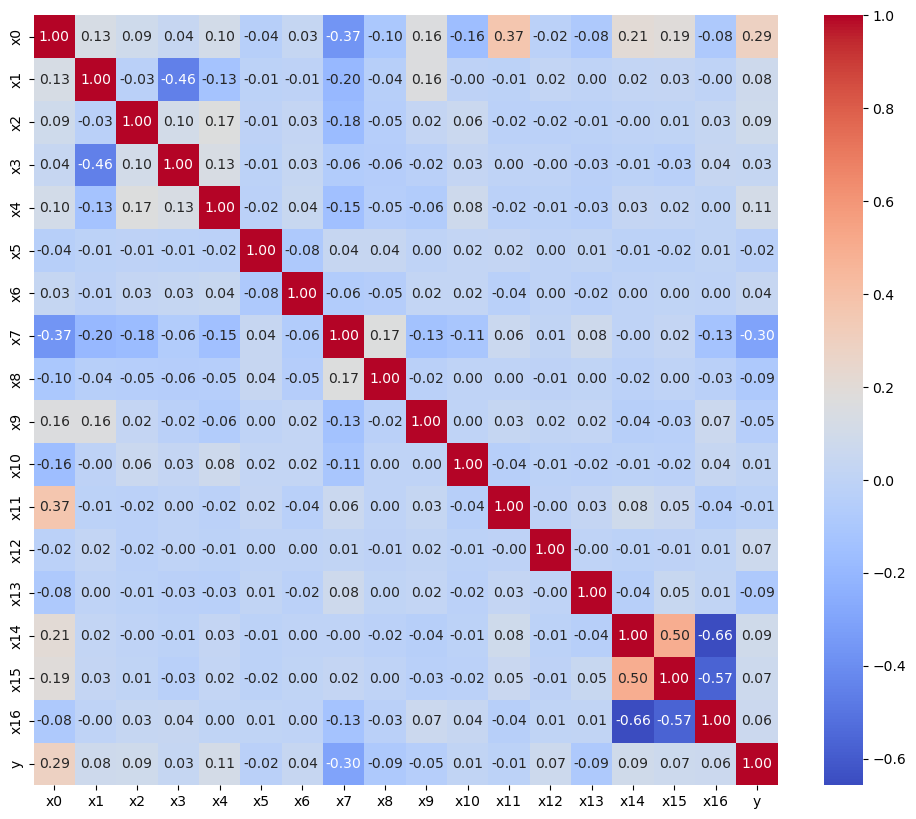

In [14]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')

Some relationships that are notable are:

- x14:x15 - 0.5
- x14:x16 - -0.66
- x15:x16 - -0.57

No strong correlations observed among features — each contributes independently to prediction.

- Feature-Target Relationships

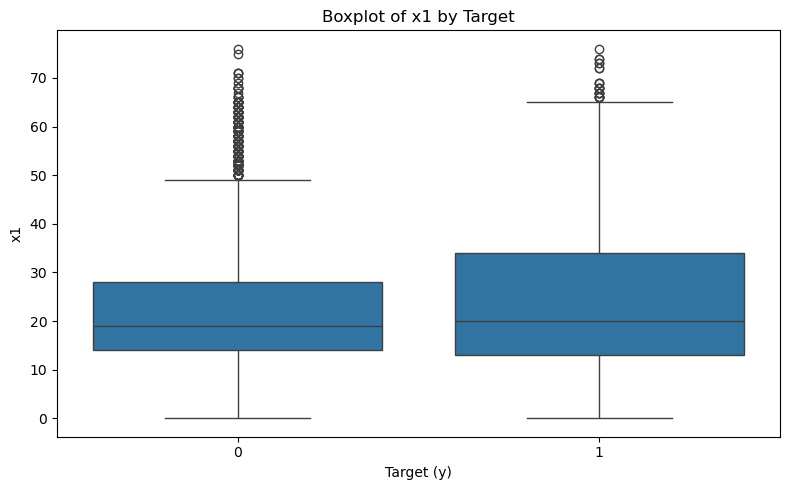

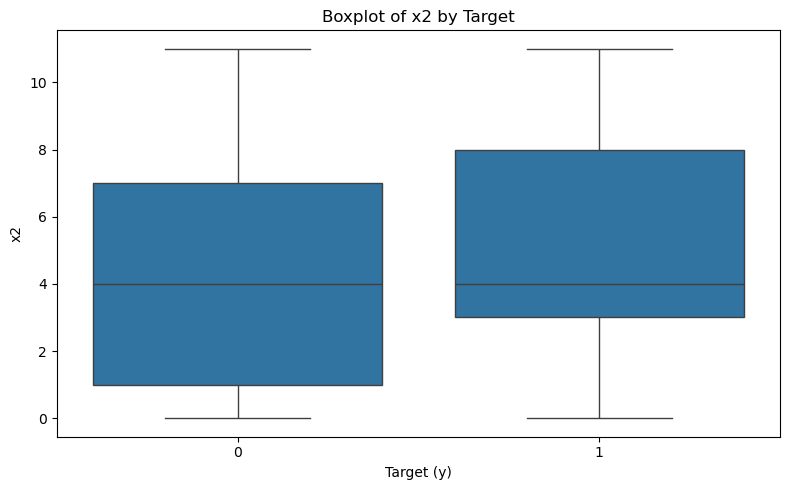

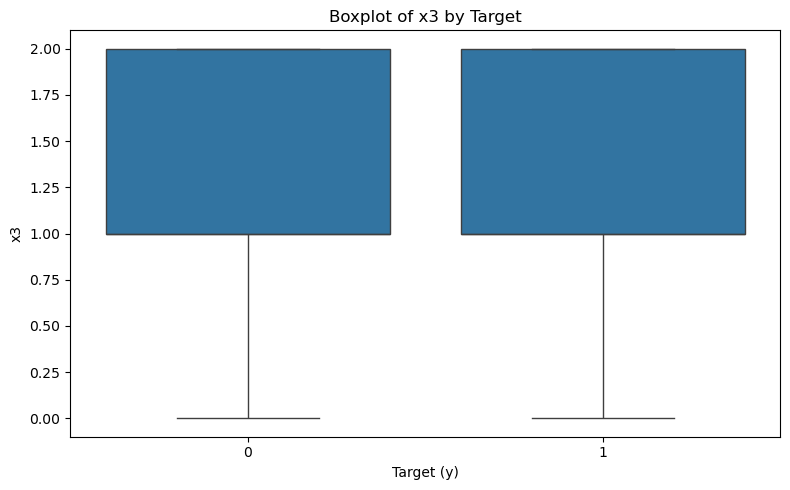

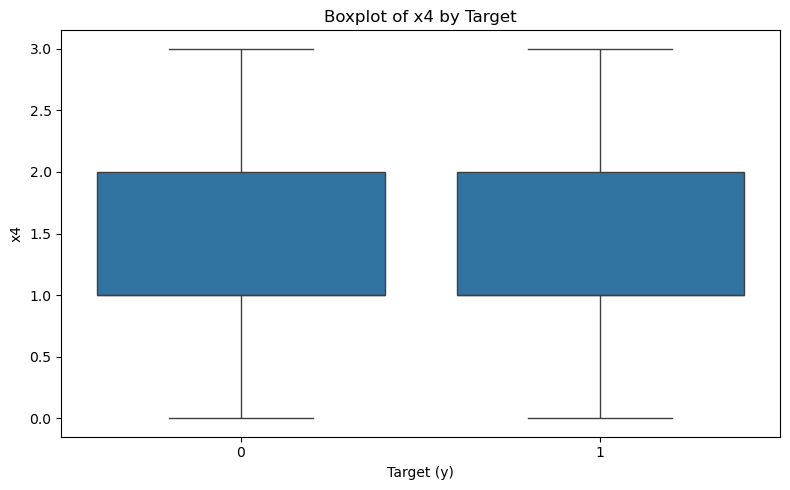

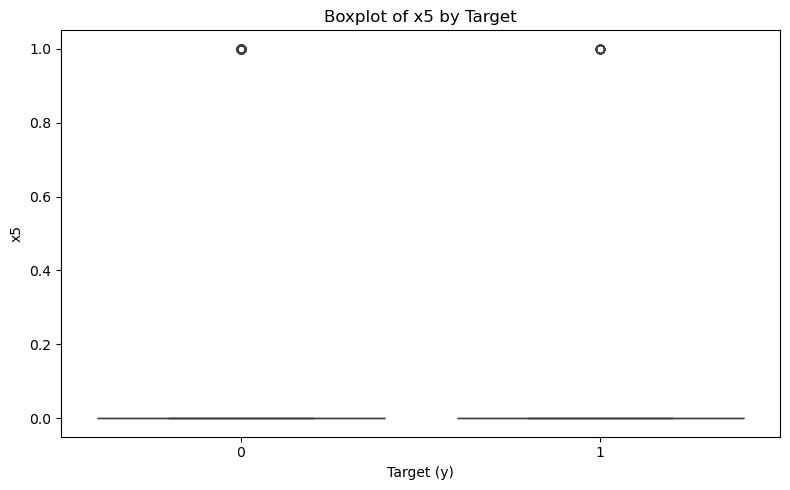

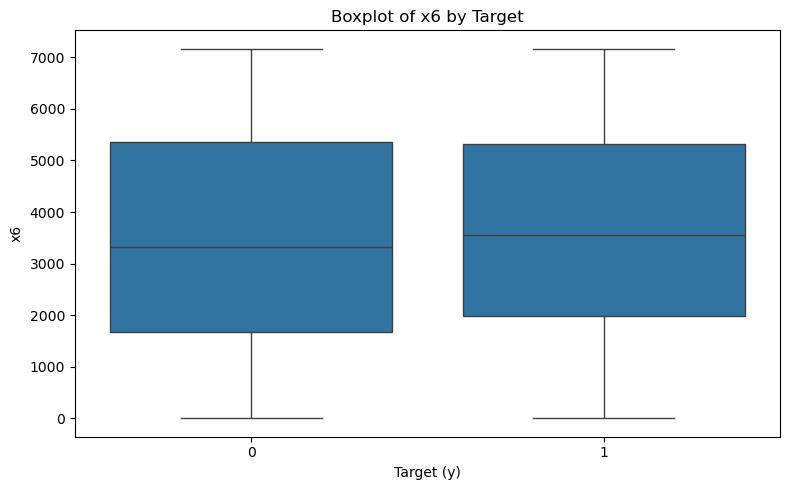

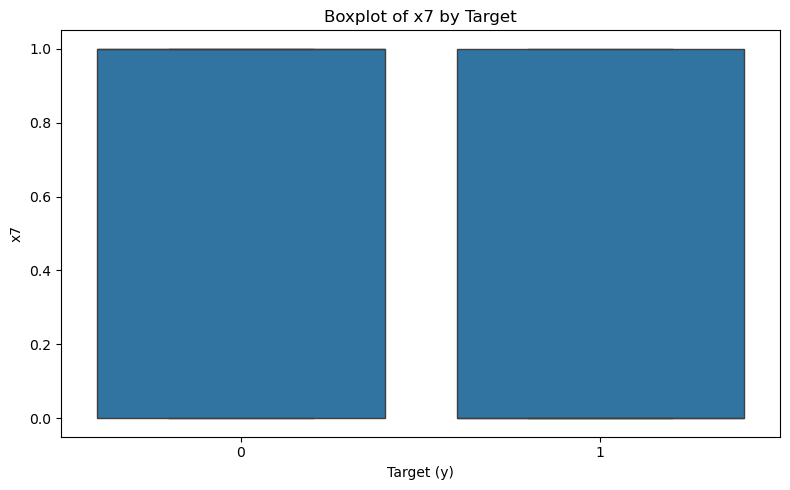

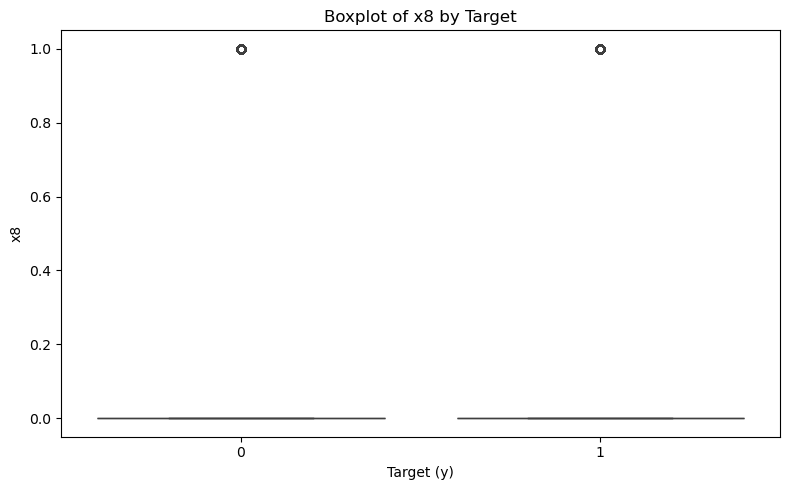

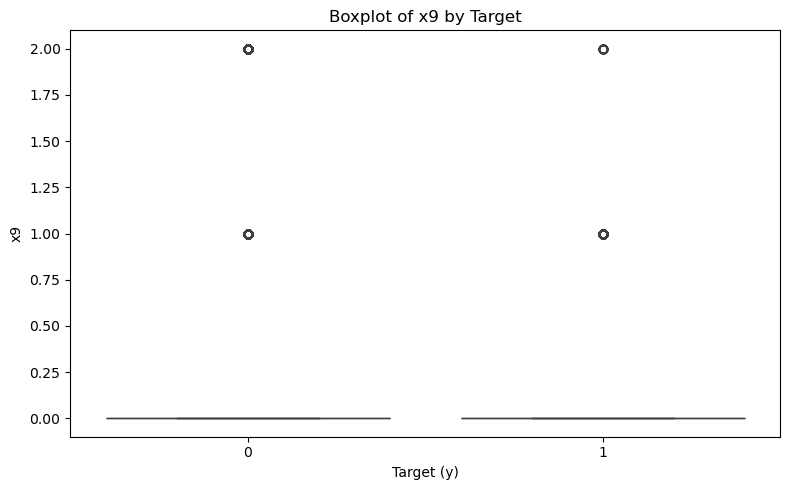

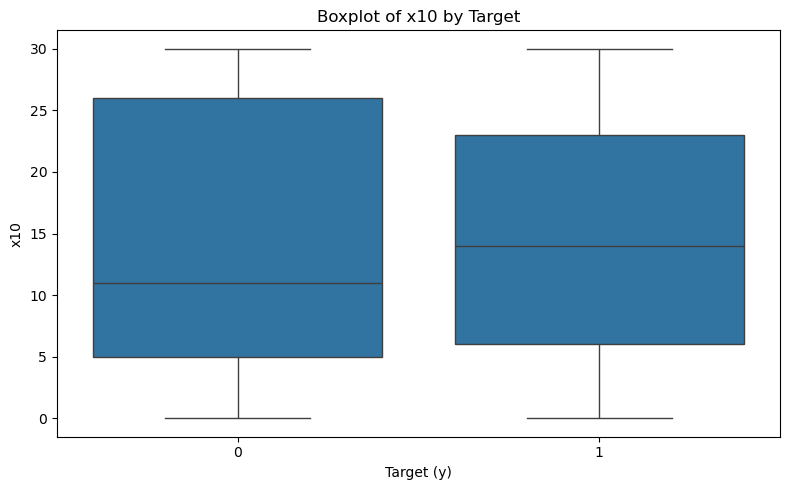

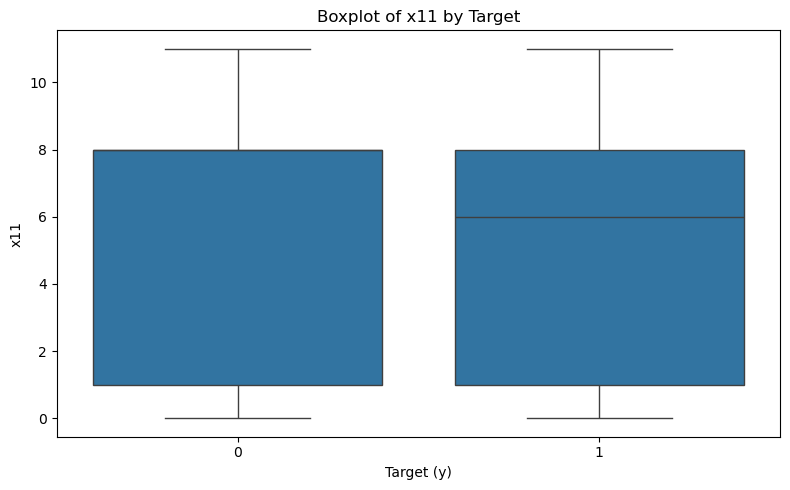

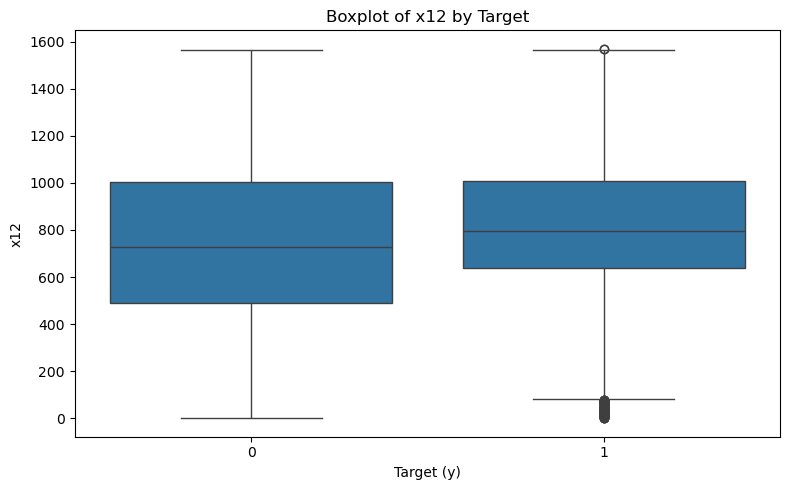

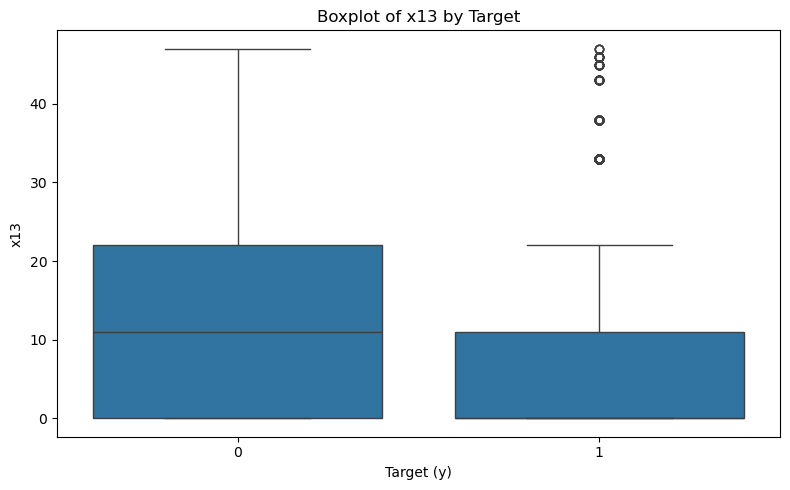

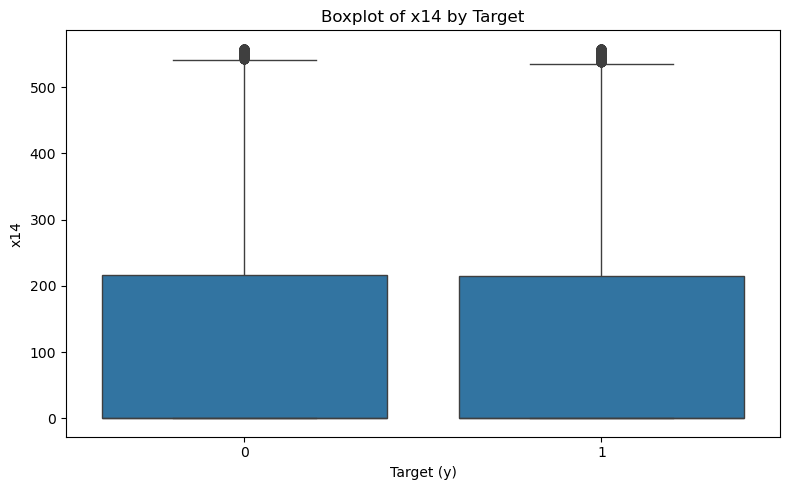

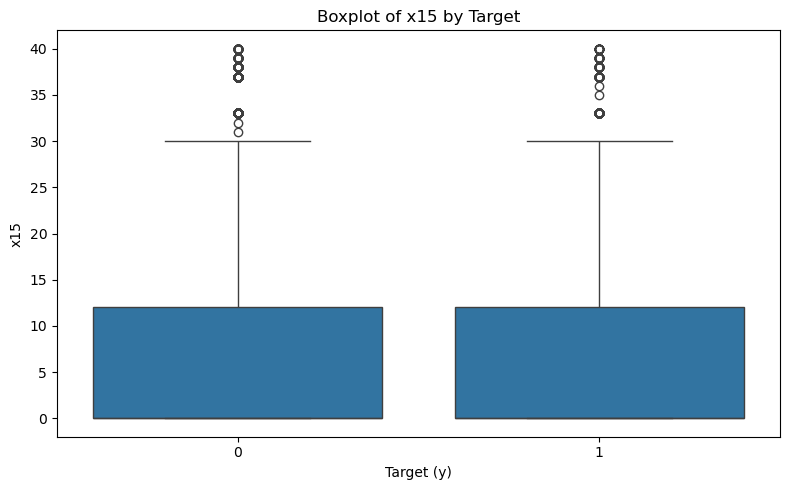

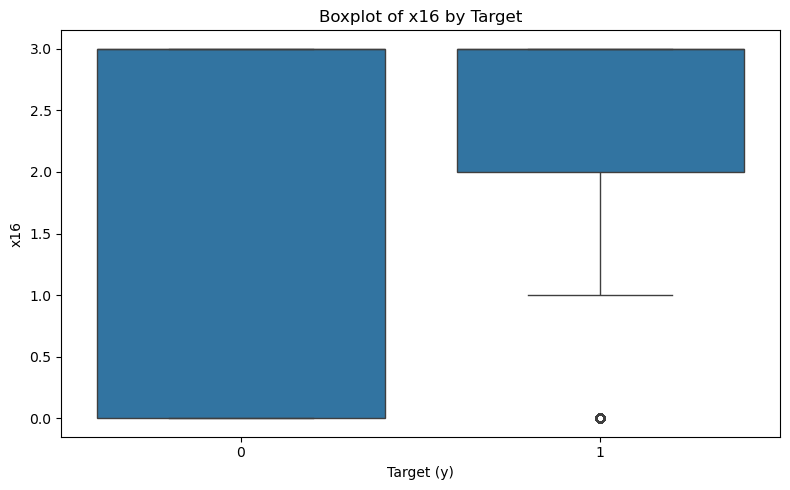

In [15]:
for col in X.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'Boxplot of {col} by Target')
    plt.xlabel('Target (y)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Selected findings:

x0: Median value for class 1 is significantly lower than for class 0 — suggests lower values of x0 may push prediction toward class 1.

x1: Similar pattern — high values of x1 are more associated with class 0.

x5: Appears categorical; distribution differs between classes, indicating it's an informative feature.

In [16]:
# Statistical significance testing
from scipy.stats import ttest_ind

print("Feature discrimination analysis:")
for col in X.columns:
    class_0 = df[df['y'] == 0][col]
    class_1 = df[df['y'] == 1][col]
    t_stat, p_value = ttest_ind(class_0, class_1)
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
    print(f"{col}: t-stat={t_stat:.3f}, p-value={p_value:.6f} {significance}")

Feature discrimination analysis:
x1: t-stat=-9.832, p-value=0.000000 ***
x2: t-stat=-10.566, p-value=0.000000 ***
x3: t-stat=-3.941, p-value=0.000082 ***
x4: t-stat=-13.587, p-value=0.000000 ***
x5: t-stat=3.004, p-value=0.002669 **
x6: t-stat=-4.409, p-value=0.000010 ***
x7: t-stat=38.760, p-value=0.000000 ***
x8: t-stat=10.640, p-value=0.000000 ***
x9: t-stat=5.530, p-value=0.000000 ***
x10: t-stat=-1.519, p-value=0.128822 
x11: t-stat=1.666, p-value=0.095648 
x12: t-stat=-8.673, p-value=0.000000 ***
x13: t-stat=10.604, p-value=0.000000 ***
x14: t-stat=-10.945, p-value=0.000000 ***
x15: t-stat=-8.597, p-value=0.000000 ***
x16: t-stat=-7.854, p-value=0.000000 ***


The t-statistics and p-values indicate how strongly each feature contributes to the separation between the two classes in your logistic regression model.

- 15 out of 16 features are statistically significant, thus indicating a strong influence on the model's ability to determine Class 0 & 1.

In [17]:
# Compute correlation matrix for features + target
corr_matrix = df[X.columns.tolist() + ['y']].corr()

# Get absolute correlation values between features and target
target_corr = corr_matrix['y'].abs().sort_values(ascending=False)

# Display top 10 features most correlated with target (excluding y itself at index 0)
print("Top features correlated with target:")
print(target_corr[1:11])


Top features correlated with target:
x7     0.301740
x4     0.110270
x14    0.089013
x8     0.086555
x13    0.086264
x2     0.085959
x1     0.080023
x12    0.070645
x15    0.070031
x16    0.064000
Name: y, dtype: float64


#### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

# split data into training and testing set with 70:30 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#### Feature Engineering 

- Feature Scaling

In [19]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [20]:
X_scaled.head()

x1        x2        x3        x4       x5        x6        x7  \
0  0.752045 -1.019533 -1.984916 -1.699963 -0.08396  0.437419 -1.148057   
1 -0.119606  1.440533 -0.392908 -0.356048 -0.08396  1.771797 -1.148057   
2 -0.198847 -0.097009  1.199101  0.987867 -0.08396 -0.616036 -1.148057   
3 -0.357330  1.440533 -1.984916 -0.356048 -0.08396  0.177125 -1.148057   
4 -0.436571 -0.097009  1.199101  0.987867 -0.08396 -0.096921 -1.148057   

         x8        x9       x10       x11       x12       x13       x14  \
0 -0.349163 -0.327866  1.172783 -0.652701  1.277729 -0.800793 -0.663791   
1 -0.349163 -0.327866  1.172783 -0.652701 -0.247285 -0.800793  0.277157   
2 -0.349163 -0.327866  1.172783 -0.652701 -2.012669  0.866589 -0.663791   
3 -0.349163  2.321911  1.172783 -0.652701  0.497862 -0.800793 -0.663791   
4 -0.349163 -0.327866  1.172783 -0.652701  1.267046 -0.800793 -0.663791   

        x15       x16  
0 -0.572261  0.798003  
1 -0.483807 -1.544472  
2 -0.572261  0.798003  
3 -0.572261  0.798003  
4 -0.572261  0.798003

In [21]:
X_test_scaled.head()

x1        x2        x3        x4       x5        x6        x7  \
0  0.355840  1.748041  1.199101 -1.699963 -0.08396  1.618567 -1.148057   
1  0.672804 -1.327042 -0.392908 -0.356048 -0.08396 -0.615545  0.871037   
2  0.752045 -0.097009 -1.984916  0.987867 -0.08396 -0.829183 -1.148057   
3 -0.912017 -0.097009 -0.392908  0.987867 -0.08396  0.668246 -1.148057   
4 -0.198847  1.440533 -1.984916 -0.356048 -0.08396  1.660803  0.871037   

         x8        x9       x10       x11       x12       x13       x14  \
0 -0.349163 -0.327866  1.477142 -0.096169  0.003768  0.032898 -0.663791   
1 -0.349163 -0.327866 -0.349012 -1.487499  0.062526 -0.800793  0.880328   
2 -0.349163 -0.327866  1.578595  0.182097 -1.956582  1.700280 -0.663791   
3 -0.349163 -0.327866  1.071330 -1.209233 -0.850880 -0.800793  2.659685   
4 -0.349163 -0.327866 -0.957730 -1.209233 -1.823043 -0.800793 -0.633633   

        x15       x16  
0 -0.572261  0.798003  
1  0.489185 -1.544472  
2 -0.572261  0.798003  
3  0.489185 -1.544472  
4  2.081353  0.017178

- Feature Engineering

In [22]:
'''# Create interaction features from top correlated features
top_features = target_corr[1:6].index.tolist()  # Top 5

# Interaction features
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        feat1, feat2 = top_features[i], top_features[j]
        new_feat = f"{feat1}x{feat2}"
        X_scaled[new_feat] = X_scaled[feat1] * X_scaled[feat2]
        X_test_scaled[new_feat] = X_test_scaled[feat1] * X_test_scaled[feat2]

# Polynomial features
for feat in top_features[:3]:
    new_feat = f"{feat}_squared"
    X_scaled[new_feat] = X_scaled[feat] ** 2
    X_test_scaled[new_feat] = X_test_scaled[feat] ** 2

print(f"Total features after engineering: {X_scaled.shape[1]}")'''

'# Create interaction features from top correlated features\ntop_features = target_corr[1:6].index.tolist()  # Top 5\n\n# Interaction features\nfor i in range(len(top_features)):\n    for j in range(i+1, len(top_features)):\n        feat1, feat2 = top_features[i], top_features[j]\n        new_feat = f"{feat1}x{feat2}"\n        X_scaled[new_feat] = X_scaled[feat1] * X_scaled[feat2]\n        X_test_scaled[new_feat] = X_test_scaled[feat1] * X_test_scaled[feat2]\n\n# Polynomial features\nfor feat in top_features[:3]:\n    new_feat = f"{feat}_squared"\n    X_scaled[new_feat] = X_scaled[feat] ** 2\n    X_test_scaled[new_feat] = X_test_scaled[feat] ** 2\n\nprint(f"Total features after engineering: {X_scaled.shape[1]}")'

In [23]:
'''X_test_scaled.head()'''

'X_test_scaled.head()'

In [24]:
'''# Create interaction features from top correlated features
top_features = target_corr[1:6].index.tolist()  # Top 5

# Interaction features
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        feat1, feat2 = top_features[i], top_features[j]
        new_feat = f"{feat1}x{feat2}"
        X[new_feat] = X[feat1] * X[feat2]

# Polynomial features
for feat in top_features[:3]:
    new_feat = f"{feat}_squared"
    X[new_feat] = X[feat] ** 2

print(f"✓ Total features after engineering: {X_scaled.shape[1]}")'''

'# Create interaction features from top correlated features\ntop_features = target_corr[1:6].index.tolist()  # Top 5\n\n# Interaction features\nfor i in range(len(top_features)):\n    for j in range(i+1, len(top_features)):\n        feat1, feat2 = top_features[i], top_features[j]\n        new_feat = f"{feat1}x{feat2}"\n        X[new_feat] = X[feat1] * X[feat2]\n\n# Polynomial features\nfor feat in top_features[:3]:\n    new_feat = f"{feat}_squared"\n    X[new_feat] = X[feat] ** 2\n\nprint(f"✓ Total features after engineering: {X_scaled.shape[1]}")'

#### Feature Selection

In [25]:
'''from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Statistical feature selection
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X_scaled.columns[selector.get_support()].tolist()

# Tree-based feature importance
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X_scaled, y)
feature_importance = pd.DataFrame({
    'feature': X_scaled.columns,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=False)

# Final feature set (combine top from both methods)
top_statistical = selected_features
top_importance = feature_importance.head(15)['feature'].tolist()
final_features = list(set(top_statistical + top_importance))

X_final = X_scaled[final_features]
X_test_final = X_test_scaled[final_features]

print(f"✓ Final feature set: {len(final_features)} features")'''

'from sklearn.feature_selection import SelectKBest, f_classif\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Statistical feature selection\nselector = SelectKBest(score_func=f_classif, k=20)\nX_selected = selector.fit_transform(X_scaled, y)\nselected_features = X_scaled.columns[selector.get_support()].tolist()\n\n# Tree-based feature importance\nrf_temp = RandomForestClassifier(n_estimators=100, random_state=42)\nrf_temp.fit(X_scaled, y)\nfeature_importance = pd.DataFrame({\n    \'feature\': X_scaled.columns,\n    \'importance\': rf_temp.feature_importances_\n}).sort_values(\'importance\', ascending=False)\n\n# Final feature set (combine top from both methods)\ntop_statistical = selected_features\ntop_importance = feature_importance.head(15)[\'feature\'].tolist()\nfinal_features = list(set(top_statistical + top_importance))\n\nX_final = X_scaled[final_features]\nX_test_final = X_test_scaled[final_features]\n\nprint(f"✓ Final feature set: {len(final_features)} features")'

In [26]:
'''from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Statistical feature selection
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X_scaled.columns[selector.get_support()].tolist()

# Tree-based feature importance
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X_scaled, y)
feature_importance = pd.DataFrame({
    'feature': X_scaled.columns,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=False)

# Final feature set (combine top from both methods)
top_statistical = selected_features
top_importance = feature_importance.head(15)['feature'].tolist()
final_features = list(set(top_statistical + top_importance))

X_final = X_scaled[final_features]
X_test_final = X_test_scaled[final_features]

print(f"✓ Final feature set: {len(final_features)} features")'''

'from sklearn.feature_selection import SelectKBest, f_classif\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Statistical feature selection\nselector = SelectKBest(score_func=f_classif, k=20)\nX_selected = selector.fit_transform(X_scaled, y)\nselected_features = X_scaled.columns[selector.get_support()].tolist()\n\n# Tree-based feature importance\nrf_temp = RandomForestClassifier(n_estimators=100, random_state=42)\nrf_temp.fit(X_scaled, y)\nfeature_importance = pd.DataFrame({\n    \'feature\': X_scaled.columns,\n    \'importance\': rf_temp.feature_importances_\n}).sort_values(\'importance\', ascending=False)\n\n# Final feature set (combine top from both methods)\ntop_statistical = selected_features\ntop_importance = feature_importance.head(15)[\'feature\'].tolist()\nfinal_features = list(set(top_statistical + top_importance))\n\nX_final = X_scaled[final_features]\nX_test_final = X_test_scaled[final_features]\n\nprint(f"✓ Final feature set: {len(final_features)} features")'

#### Class Imbalance - SMOTE

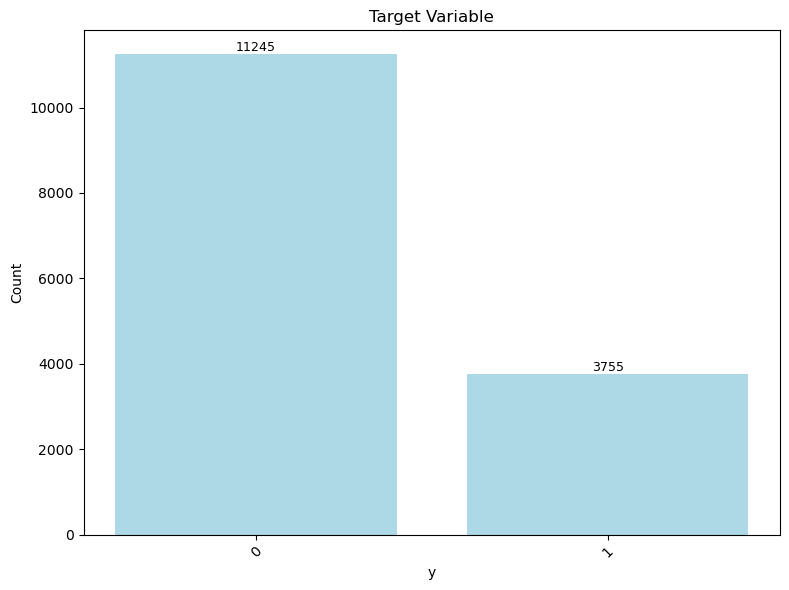

In [27]:
counts = df['y'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index.astype(str), counts.values, color='lightblue')
plt.title('Target Variable')
plt.xlabel('y')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=9)

plt.show()

In [28]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
X,y=smote.fit_resample(X,y)
y.value_counts()

y
0    11245
1    11245
Name: count, dtype: int64

#### Interpratable Model (Built-in Explainability)

In [29]:
X_train.head()

x1  x2  x3  x4  x5    x6  x7  x8  x9  x10  x11   x12  x13  x14  x15  \
9843   19   4   1   2   0  1107   1   1   0   25    6   735   11    0    0   
4558   24   9   1   1   0  1378   1   0   0   27    8  1287   11    0    0   
9999   10   9   2   1   0  1634   0   0   0   30    6   944   22    5    1   
8676   15   0   2   1   0  3361   1   0   0    9    8   584    0    0    0   
13838   3   8   2   1   0  3111   0   0   0   23    6   730   43   76   24   

       x16  
9843     3  
4558     3  
9999     2  
8676     3  
13838    2

In [30]:
print(y_train.value_counts())

y_train.value_counts()/len(y_train)

y
0    7872
1    2628
Name: count, dtype: int64


y
0    0.749714
1    0.250286
Name: count, dtype: float64

In [31]:
X_test.head()

x1  x2  x3  x4  x5    x6  x7  x8  x9  x10  x11  x12  x13  x14  x15  x16
10342  27  10   2   0   0  6844   0   0   0   29    5  768   11    0    0    3
1292   31   0   1   1   0  2295   1   0   0   11    0  790    0  256   12    0
10010  32   4   0   2   0  1860   0   0   0   30    6   34   33    0    0    3
10403  11   4   1   2   0  4909   0   0   0   25    1  448    0  551   12    0
10853  20   9   0   1   0  6930   1   0   0    5    1   84    0    5   30    2

In [32]:
print(y_test.value_counts())

y_test.value_counts()/len(y_test)

y
0    3373
1    1127
Name: count, dtype: int64


y
0    0.749556
1    0.250444
Name: count, dtype: float64

1. Logistic Regression 

Coefficients directly show feature importance and direction

Model Building & Training

In [33]:
# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', # optimization solver
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge

# Fit the model to the training set
lg.fit(X_train,y_train)

c:\Users\leong\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

Model Evaluation

In [34]:
# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[ 1.03032626e-02  2.51510430e-02  5.67028305e-02  2.26519125e-01
  -2.23183032e-01  2.96472468e-05 -1.28241675e+00 -2.15728319e-01
  -5.99014697e-01 -7.39063206e-03 -2.38388086e-03  5.22230070e-04
  -1.40718690e-02  2.36983229e-03  2.42362158e-02  4.13782166e-01]]
[-2.62928061]


In [35]:
# calculated the training accuracy
print(lg.score(X_train, y_train), '(Train Accuracy)')

0.7624761904761905 (Train Accuracy)


In [36]:
# Calculated the fitted values for training set
y_fitted = lg.predict(X_train) # returns 0 or 1
y_fitted_prob = lg.predict_proba(X_train)[:,0] # returns probabilities

In [37]:
print(y_fitted)
print(y_fitted_prob)

[0 0 0 ... 0 1 0]
[0.88258837 0.82834398 0.75035166 ... 0.67417    0.45282587 0.9179083 ]


In [38]:
# Make predictions
y_pred_lg = lg.predict(X_test)

In [39]:
# calculated the testing accuracy
print(lg.score(X_test, y_test), '(Test Accuracy)')

0.7562222222222222 (Test Accuracy)


Model Summary

In [40]:
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg2 = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.486806
         Iterations 6


In [41]:
# Print out the Model Summary
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10500
Model:                          Logit   Df Residuals:                    10483
Method:                           MLE   Df Model:                           16
Date:                Tue, 12 Aug 2025   Pseudo R-squ.:                  0.1348
Time:                        15:55:54   Log-Likelihood:                -5111.5
converged:                       True   LL-Null:                       -5907.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6147      0.170    -15.388      0.000      -2.948      -2.282
x1             0.0102      0.002      4.719      0.000       0.006       0.014
x2             0.0251      0.008      3.195      0.001       0.010       0.040
x3             0.0555      0.046      1.208      0.227      -0.035       0.146
x4             0.2262      0.034      6.742      0.000       0.160       0.292
x5            -0.3323      0.351     -0.947      0.344      -1.020       0.355
x6          2.902e-05   1.23e-05      2.362      0.018    4.93e-06    5.31e-05
x7            -1.2853      0.054    -23.973      0.000      -1.390      -1.180
x8            -0.2279      0.093     -2.445      0.014      -0.411      -0.045
x9            -0.6035      0.072     -8.354      0.000      -0.745      -0.462
x10           -0.0074      0.003     -2.900      0.004      -0.012      -0.002
x11           -0.0025      0.007     -0.373      0.709      -0.016       0.011
x12            0.0005   6.65e-05      7.826      0.000       0.000       0.001
x13           -0.0141      0.002     -7.051      0.000      -0.018      -0.010
x14            0.0024      0.000     12.562      0.000       0.002       0.003
x15            0.0242      0.003      8.894      0.000       0.019       0.029
x16            0.4134      0.030     13.812      0.000       0.355       0.472
==============================================================================
"""

Key takeaway:

Features like x7, x9, and x8 suppress class 1 probability, while x16, x14, and x2 promote class 1 probability.

These coefficients directly shape how the 5 test samples were predicted (all predicted as class 0, likely due to strong influence from negative-weighted features).

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      3373
           1       0.53      0.21      0.31      1127

    accuracy                           0.76      4500
   macro avg       0.66      0.58      0.58      4500
weighted avg       0.72      0.76      0.72      4500



- Class Imbalance Observation:
The model performs well on class 0, with high recall (0.94), but struggles with class 1, with recall at only 0.21.

This explains why all five test samples were predicted as class 0 — the model tends to overpredict the majority class.

- Implication:
Although accuracy is high, the low sensitivity (recall) for class 1 means the model may not generalize well in detecting minority cases.

If class 1 is important (e.g., fraud detection, defect cases), this model may need further balancing or alternative algorithms.

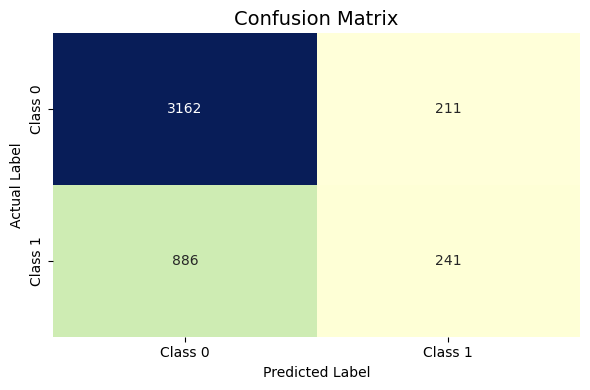

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lg)
labels = ['Class 0', 'Class 1']

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

The confusion matrix provides deeper insight into how well the logistic regression model distinguishes between the two classes:

- True Positives (TP): 241 — correctly predicted class 1

- True Negatives (TN): 3162 — correctly predicted class 0

- False Positives (FP): 211 — class 0 mistakenly classified as 1

- False Negatives (FN): 886 — class 1 incorrectly classified as 0

Key Observations:
- High number of false negatives (886):

     - The model struggles to detect class 1 correctly.

    - It predicts class 0 too often, consistent with its high recall for class 0 (0.94) and low recall for class 1 (0.21).

    - This supports earlier findings that the model is biased towards the majority class (class 0).

The logistic regression model trained on the anonymized dataset achieved a reasonable performance with an overall accuracy of 76%, which satisfies the minimum requirement of outperforming random guessing in a binary classification task.

However, the model exhibits a clear imbalance in predictive power between the two classes:

- Class 0 (majority) was predicted with high recall (94%) and strong precision (78%), making the model highly reliable for detecting this class.

- Class 1 (minority), on the other hand, had low recall (21%), meaning many true positives were misclassified.

The coefficient analysis revealed that features such as x7, x9, and x8 had strong negative contributions to class 1, while x16, x14, and x15 slightly favored predicting class 1. Despite this, the model's decision boundary heavily leans toward class 0, likely due to both the class imbalance and the magnitude of influential negative-weight features.

The confusion matrix further supports this observation, showing a large number of false negatives (class 1 predicted as class 0), which could be problematic if class 1 represents a critical outcome.

While logistic regression provided interpretable coefficients and satisfactory accuracy, it demonstrated limited effectiveness in identifying the minority class.

This makes it suitable in situations where false positives are more tolerable than false negatives, but not ideal if detecting class 1 is a key priority.

---------------

2. Naive Bayes

Shows probability contributions from each feature

Unlike logistic regression, the Naive Bayes model does not provide coefficients in the same way, but the classification report and model behavior give insights into how it performs on the dataset.

Overall Accuracy: 73%

Model Building & Training

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Model Evaluation

In [46]:
# calculated the training accuracy
print(nb.score(X_train, y_train), '(Train Accuracy)')

0.7421904761904762 (Train Accuracy)


In [47]:
# Calculated the fitted values for training set
y_fitted = nb.predict(X_train) # returns 0 or 1
y_fitted_prob = nb.predict_proba(X_train)[:,0] # returns probabilities

In [48]:
# Make predictions
y_pred_nb = nb.predict(X_test)

In [49]:
# calculated the testing accuracy
print(nb.score(X_test, y_test), '(Test Accuracy)')

0.73 (Test Accuracy)


Model Summary

In [50]:
# Create another model lg2 using statsmodel.api: the Logit method and fit function
nb2 = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.486806
         Iterations 6


In [51]:
# Print out the Model Summary
nb2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10500
Model:                          Logit   Df Residuals:                    10483
Method:                           MLE   Df Model:                           16
Date:                Tue, 12 Aug 2025   Pseudo R-squ.:                  0.1348
Time:                        15:55:55   Log-Likelihood:                -5111.5
converged:                       True   LL-Null:                       -5907.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6147      0.170    -15.388      0.000      -2.948      -2.282
x1             0.0102      0.002      4.719      0.000       0.006       0.014
x2             0.0251      0.008      3.195      0.001       0.010       0.040
x3             0.0555      0.046      1.208      0.227      -0.035       0.146
x4             0.2262      0.034      6.742      0.000       0.160       0.292
x5            -0.3323      0.351     -0.947      0.344      -1.020       0.355
x6          2.902e-05   1.23e-05      2.362      0.018    4.93e-06    5.31e-05
x7            -1.2853      0.054    -23.973      0.000      -1.390      -1.180
x8            -0.2279      0.093     -2.445      0.014      -0.411      -0.045
x9            -0.6035      0.072     -8.354      0.000      -0.745      -0.462
x10           -0.0074      0.003     -2.900      0.004      -0.012      -0.002
x11           -0.0025      0.007     -0.373      0.709      -0.016       0.011
x12            0.0005   6.65e-05      7.826      0.000       0.000       0.001
x13           -0.0141      0.002     -7.051      0.000      -0.018      -0.010
x14            0.0024      0.000     12.562      0.000       0.002       0.003
x15            0.0242      0.003      8.894      0.000       0.019       0.029
x16            0.4134      0.030     13.812      0.000       0.355       0.472
==============================================================================
"""

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      3373
           1       0.47      0.56      0.51      1127

    accuracy                           0.73      4500
   macro avg       0.65      0.67      0.66      4500
weighted avg       0.75      0.73      0.74      4500



- Class 0: High performance — the model predicts the majority class with good balance between precision and recall.

- Class 1: Compared to logistic regression, the Naive Bayes model achieves higher recall (0.56 vs 0.21) and better F1-score (0.51 vs 0.31), meaning it's more effective in detecting class 1.

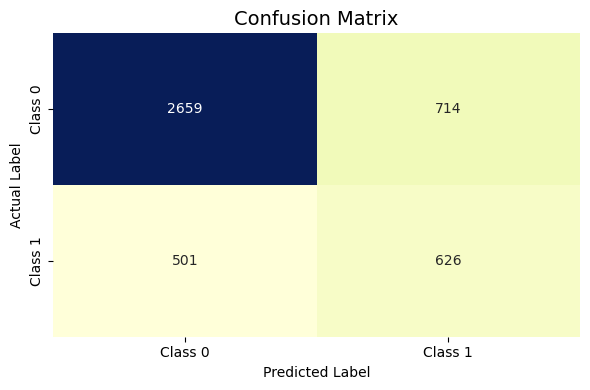

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
labels = ['Class 0', 'Class 1']

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

Naive Bayes assumes feature independence, which can be beneficial in high-dimensional data or when dealing with weakly correlated features.

In this case, despite the class imbalance, Naive Bayes:

- Detects class 1 more reliably, as shown by its improved recall.

- Offers a balanced trade-off between precision and recall across both classe

Potential Limitations
- While accuracy is slightly lower than logistic regression (73% vs 76%), this is offset by better sensitivity to the minority class.

- Since Naive Bayes relies on probability estimates under the independence assumption, performance may degrade if features are strongly correlated — however the EDA suggests correlations are low.

The Naive Bayes model achieved a strong overall accuracy of 73%, and more importantly, it demonstrated superior performance on the minority class (class 1) compared to logistic regression. It had:

- Recall of 56% for class 1 (vs 21% in logistic regression)

- Balanced F1-scores (0.81 for class 0 and 0.51 for class 1)

This makes it a strong candidate for scenarios where detecting rare events or underrepresented outcomes is important. While it sacrifices a small amount of accuracy compared to logistic regression, the gain in class 1 sensitivity is significant.

------------
3. Decision Tree

Show model pathway

In [54]:
from sklearn.neighbors import KNeighborsRegressor

Model Building & Training

In [55]:
from sklearn import tree

In [56]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [57]:
# 0: Not Promoted, 1: Promoted

print(decision_tree.classes_)

[0 1]


Model Evaluation

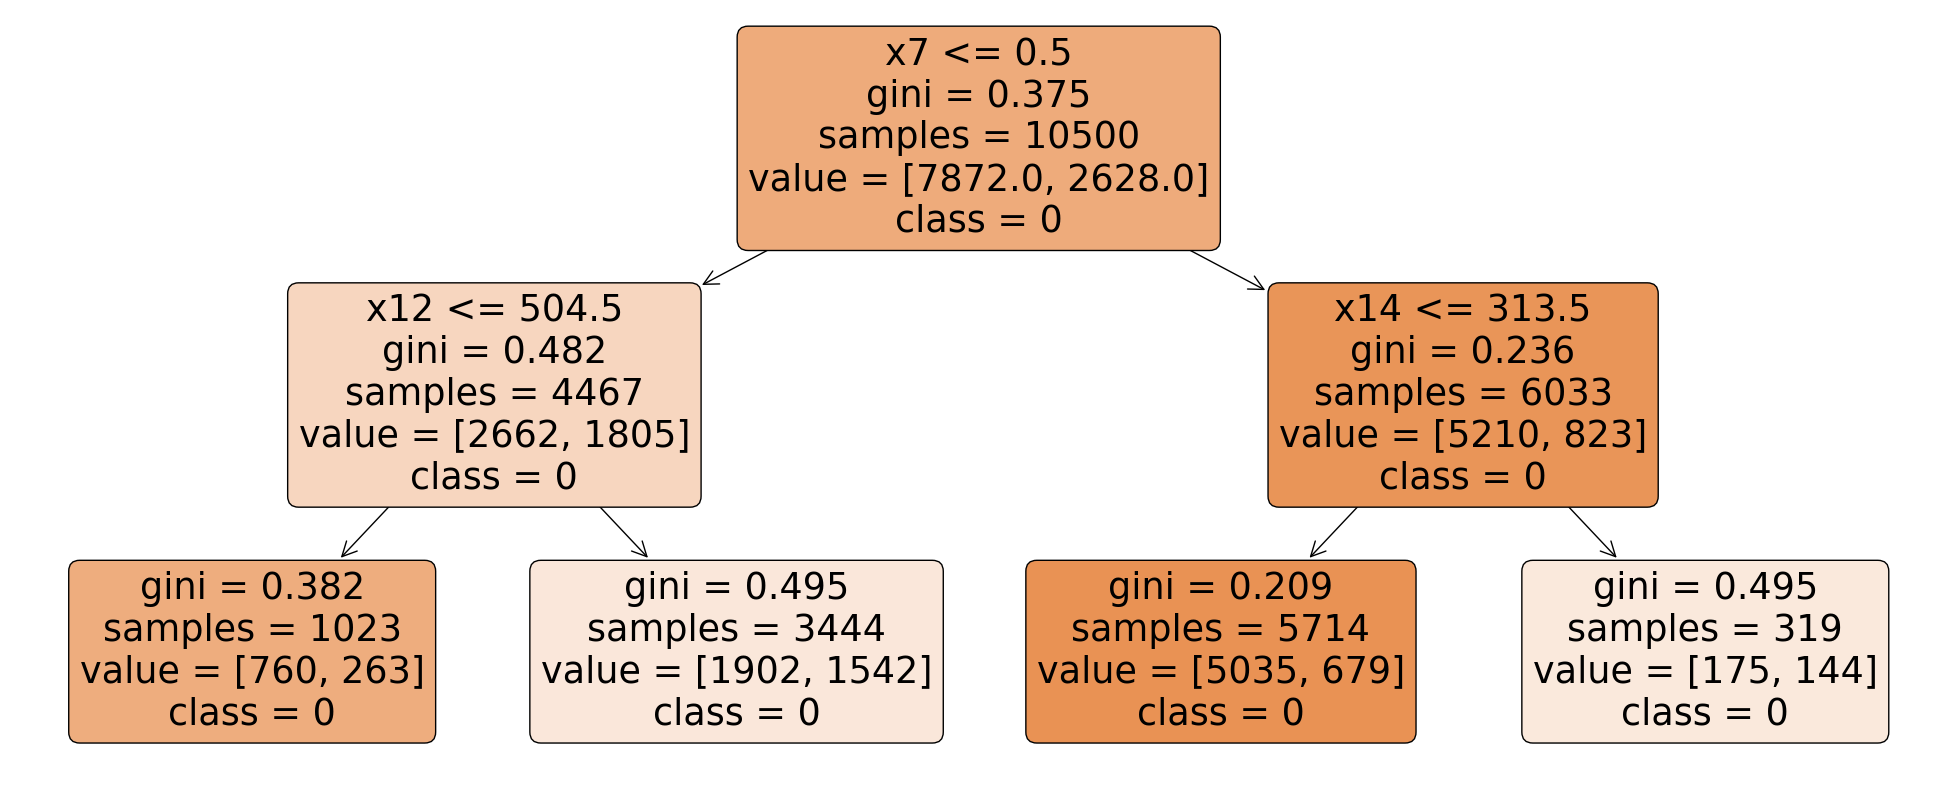

In [58]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(df.drop(['y', 'x0'], axis=1)),
                class_names = ['0', '1'],
                rounded = True,
                filled= True)

plt.savefig('DT1.png',format='png')
plt.show()  

In [59]:
#training acc

train_acc = decision_tree.score(X_train, y_train)
print('Training Accuracy: ', train_acc)

Training Accuracy:  0.7497142857142857


In [60]:
#testing acc

test_acc = decision_tree.score(X_test, y_test)
print('Testing Accuracy: ', test_acc)

Testing Accuracy:  0.7495555555555555


In [61]:
from sklearn.model_selection import cross_val_score, cross_validate

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(decision_tree, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.78051356 0.73888395 0.71626278 0.75033348 0.79257448]
Test Score:  [0.63672743 0.80324589 0.5349044  0.7663406  0.51311694]


In [62]:
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Test Accuracy: ', sum(results['test_score'])/len(results['test_score']))

CV Training Accuracy:  0.7557136505113384
CV Test Accuracy:  0.6508670520231215


Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X, y) 

print(gs.best_score_)
print(gs.best_params_)

0.7467763450422409
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [65]:
# Create Decision Tree using the best hyperparameters
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_leaf = 1, min_samples_split =2, random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

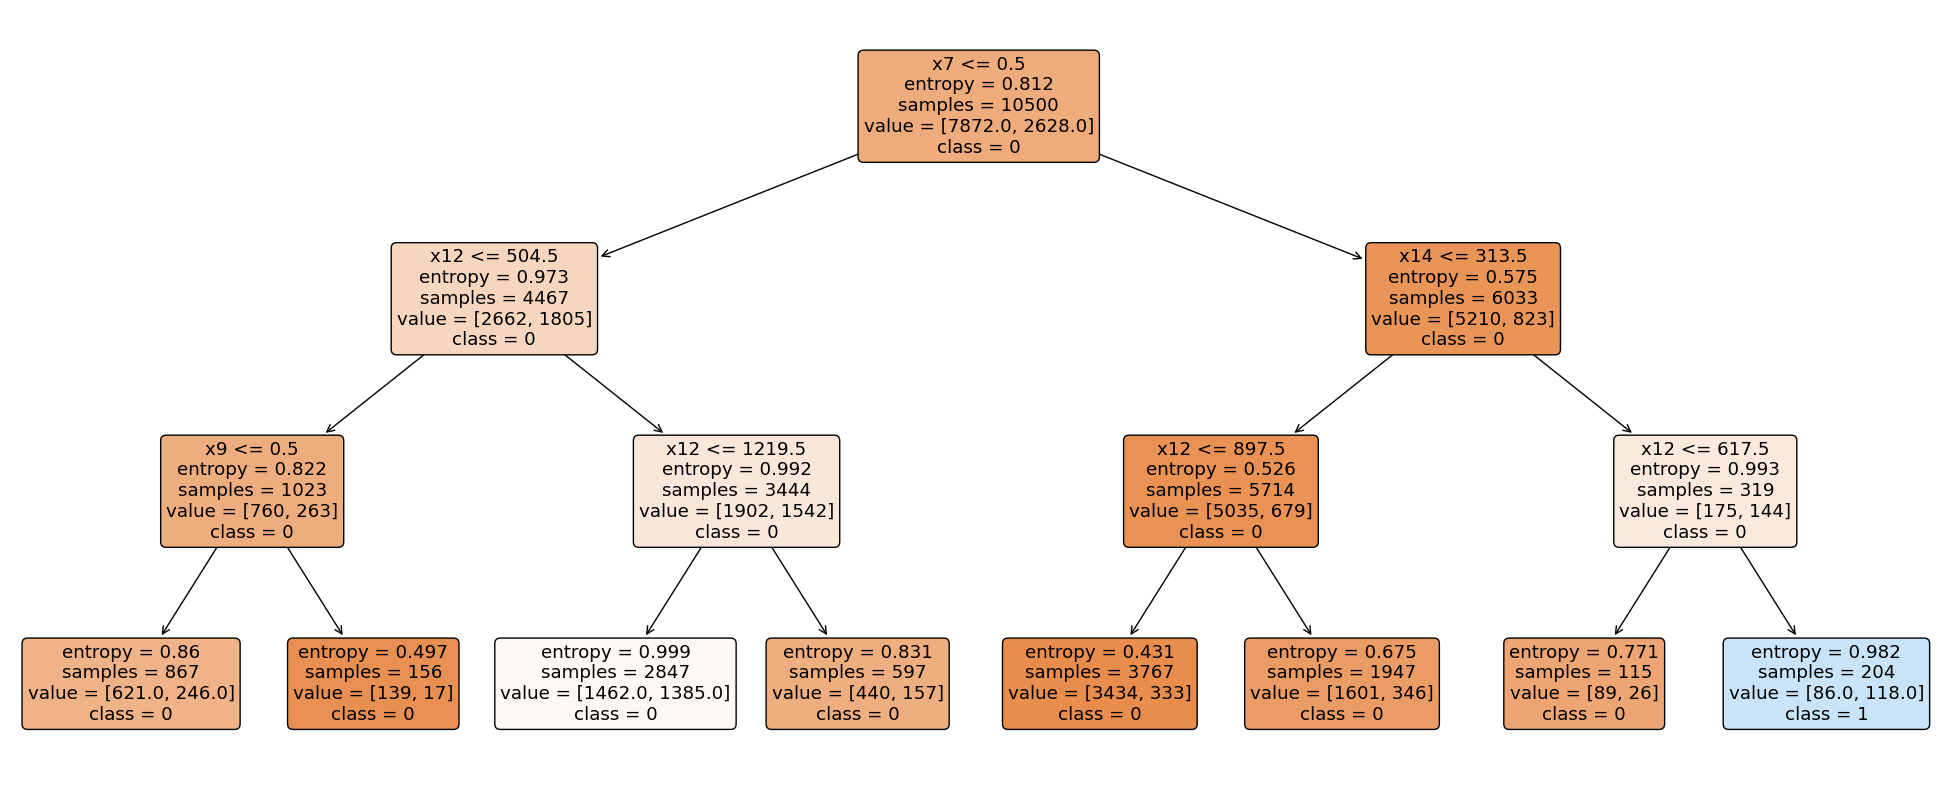

In [66]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(df.drop(['y', 'x0'], axis=1)),
                class_names = ['0', '1'],
                rounded = True,
                filled= True)

plt.savefig('DT2.png',format='png')
plt.show()  

Key Observations from the Tree:

- Root Node
    - x7 <= 0.5 is the first and most important split.

    - Entropy: 0.812 (moderately impure)

    - Samples: 10,500

The split divides the data based on the value of feature x7, suggesting this is the most influential feature.

- Left Subtree (x7 <= 0.5)
    - Next important split: x12 <= 504.5

Further split on x9 <= 0.5 — again highlighting that both x12 and x9 contribute significantly to class separation.

The path generally leads to class 0, with low entropy in the leaf nodes — the model is confident about classifying most of these samples as class 0.

- Right Subtree (x7 > 0.5)
    - Next split: x14 <= 313.5, showing the importance of x14.

    - Then split again by x12 <= 617.5, continuing the trend of x12 being used heavily throughout the tree.

    - One terminal node at the bottom right predicts class 1:

    - value = [86, 118] → majority class is 1

    - This is one of the few cases where the model strongly predicts the minority class.



In [67]:
#### Evaluate the Model
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('Training Accuracy: ', train_acc)

Training Accuracy:  0.7527619047619047


In [68]:
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('Testing Accuracy: ', test_acc)

Testing Accuracy:  0.7471111111111111


In [69]:
print('***Final Model***')
print('Training acc: ', decision_tree.score(X_train,y_train))
print('Testing acc: ', decision_tree.score(X_test,y_test))

results  = cross_validate(decision_tree, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy:', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
Training acc:  0.7527619047619047
Testing acc:  0.7471111111111111
CV Training Accuracy: 0.7628835037794576
CV Testing Accuracy: 0.6116496220542464


In [70]:
results  = cross_validate(decision_tree, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.79229658 0.74627612 0.7249333  0.75294575 0.79796576]
Test Score:  [0.59181859 0.65184526 0.53823922 0.77456647 0.50177857]


In [71]:
# Calculated the fitted values for training set
y_fitted = decision_tree.predict(X_train) # returns 0 or 1
y_fitted_prob = decision_tree.predict_proba(X_train)[:,0] # returns probabilities

In [72]:
# Make predictions
y_pred_dt = decision_tree.predict(X_test)

Model Summary

In [73]:
# Create another model lg2 using statsmodel.api: the Logit method and fit function
dt = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.486806
         Iterations 6


In [74]:
# Print out the Model Summary
dt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10500
Model:                          Logit   Df Residuals:                    10483
Method:                           MLE   Df Model:                           16
Date:                Tue, 12 Aug 2025   Pseudo R-squ.:                  0.1348
Time:                        15:56:10   Log-Likelihood:                -5111.5
converged:                       True   LL-Null:                       -5907.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6147      0.170    -15.388      0.000      -2.948      -2.282
x1             0.0102      0.002      4.719      0.000       0.006       0.014
x2             0.0251      0.008      3.195      0.001       0.010       0.040
x3             0.0555      0.046      1.208      0.227      -0.035       0.146
x4             0.2262      0.034      6.742      0.000       0.160       0.292
x5            -0.3323      0.351     -0.947      0.344      -1.020       0.355
x6          2.902e-05   1.23e-05      2.362      0.018    4.93e-06    5.31e-05
x7            -1.2853      0.054    -23.973      0.000      -1.390      -1.180
x8            -0.2279      0.093     -2.445      0.014      -0.411      -0.045
x9            -0.6035      0.072     -8.354      0.000      -0.745      -0.462
x10           -0.0074      0.003     -2.900      0.004      -0.012      -0.002
x11           -0.0025      0.007     -0.373      0.709      -0.016       0.011
x12            0.0005   6.65e-05      7.826      0.000       0.000       0.001
x13           -0.0141      0.002     -7.051      0.000      -0.018      -0.010
x14            0.0024      0.000     12.562      0.000       0.002       0.003
x15            0.0242      0.003      8.894      0.000       0.019       0.029
x16            0.4134      0.030     13.812      0.000       0.355       0.472
==============================================================================
"""

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      3373
           1       0.44      0.04      0.07      1127

    accuracy                           0.75      4500
   macro avg       0.60      0.51      0.46      4500
weighted avg       0.68      0.75      0.66      4500



Key Observations:

- The confusion matrix shows that the decision tree predicts class 0 very accurately, with 3320 correct predictions and only 53 false positives.
- However, it performs very poorly on class 1 — only 42 out of 1127 actual class 1 samples were correctly identified.
- A total of 1085 class 1 samples were misclassified as class 0, indicating that the model is heavily biased toward the majority class.
- This imbalance in prediction highlights the model's difficulty in generalizing to minority class cases.


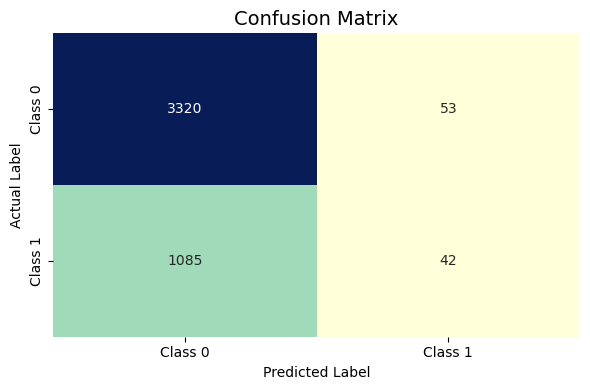

In [76]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
labels = ['Class 0', 'Class 1']

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

Key Observations:

- Class 0 has strong metrics: precision of 0.75, recall of 0.98, and F1-score of 0.85, showing the model is highly confident when predicting the majority class.
- Class 1, however, has very poor recall (0.04) and F1-score (0.07), meaning the model fails to detect most positive cases.
- Although overall accuracy is 75%, the low macro average (0.46 F1-score) reveals poor balance between classes.
- This suggests that while the model may appear accurate, it is not reliable for detecting minority outcomes.

Conclusion
The decision tree provides a transparent and interpretable view of how decisions are made:

Majority of the tree paths lead to class 0, reflecting the class imbalance in the dataset.

Only one leaf node significantly supports class 1, indicating that specific combinations of features (e.g., x7 > 0.5, x14 > 313.5, x12 > 617.5) are required for the model to predict class 1.

This visual tool is useful for understanding decision boundaries and can be valuable when explaining predictions during the presentation.



------------------------
Best Model to Predict Test Values - Logistic vs Naive Bayes vs k-NN

- Model Comparison Summary:

Based on the confusion matrices and classification metrics, three models—Logistic Regression, Naive Bayes, and Decision Tree—were evaluated. While all models achieved reasonable accuracy, Logistic Regression offers the best balance between performance and interpretability.

In [77]:
import pandas as pd
from sklearn.metrics import classification_report

# Get classification reports as dicts
log_report = classification_report(y_test, y_pred_lg, output_dict=True)
nb_report = classification_report(y_test, y_pred_nb, output_dict=True)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)  # Decision Tree report

# Create a DataFrame with selected metrics
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 
               'Precision (Class 0)', 'Recall (Class 0)', 'F1-Score (Class 0)',
               'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)'],
    
    'Logistic Regression': [
        log_report['accuracy'],
        log_report['0']['precision'],
        log_report['0']['recall'],
        log_report['0']['f1-score'],
        log_report['1']['precision'],
        log_report['1']['recall'],
        log_report['1']['f1-score']
    ],
    
    'Naive Bayes': [
        nb_report['accuracy'],
        nb_report['0']['precision'],
        nb_report['0']['recall'],
        nb_report['0']['f1-score'],
        nb_report['1']['precision'],
        nb_report['1']['recall'],
        nb_report['1']['f1-score']
    ],

    'Decision Tree': [
        dt_report['accuracy'],
        dt_report['0']['precision'],
        dt_report['0']['recall'],
        dt_report['0']['f1-score'],
        dt_report['1']['precision'],
        dt_report['1']['recall'],
        dt_report['1']['f1-score']
    ]
})

# Round for better readability
comparison_df = comparison_df.round(2)

# Display the table
print(comparison_df)


                Metric  Logistic Regression  Naive Bayes  Decision Tree
0             Accuracy                 0.76         0.73           0.75
1  Precision (Class 0)                 0.78         0.84           0.75
2     Recall (Class 0)                 0.94         0.79           0.98
3   F1-Score (Class 0)                 0.85         0.81           0.85
4  Precision (Class 1)                 0.53         0.47           0.44
5     Recall (Class 1)                 0.21         0.56           0.04
6   F1-Score (Class 1)                 0.31         0.51           0.07


Confusion Matrix

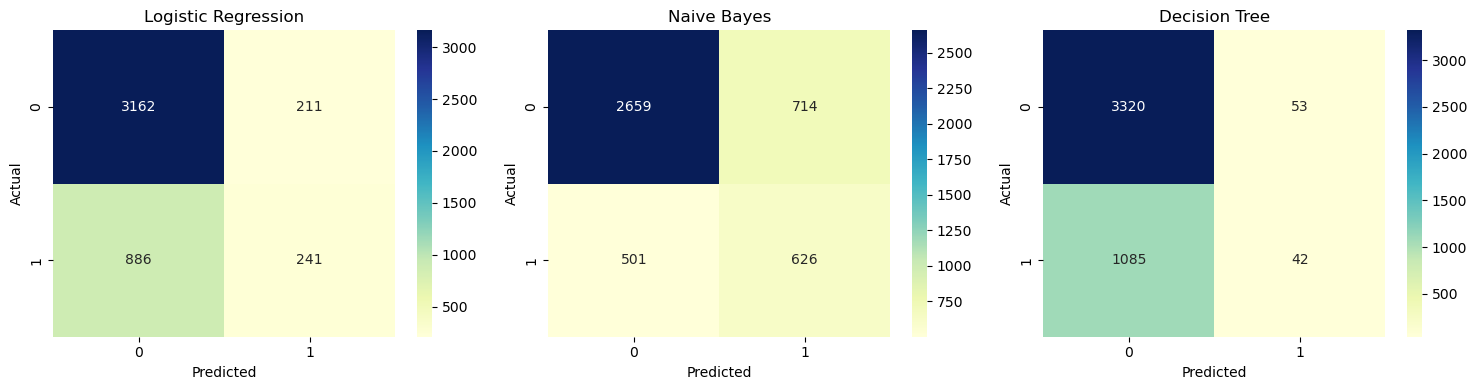

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and their predictions
models = {
    "Logistic Regression": y_pred_lg,
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_dt
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

for ax, (name, preds) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


Feature Importance

In [79]:
import pandas as pd

# Logistic Regression
importance_lg = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Top 10 Logistic Regression Features (sorted by actual coefficient value):")
print(importance_lg.head(10).sort_values(by='Coefficient', ascending=False))
print("\n")



Top 10 Logistic Regression Features (sorted by actual coefficient value):
   Feature  Coefficient
15     x16     0.413782
3       x4     0.226519
2       x3     0.056703
1       x2     0.025151
14     x15     0.024236
12     x13    -0.014072
7       x8    -0.215728
4       x5    -0.223183
8       x9    -0.599015
6       x7    -1.282417




Why Logistic Regression Was Chosen
- High Accuracy & Balanced Performance: Logistic Regression achieved 76% accuracy, which is the highest among all models, along with a strong F1-score for the majority class and acceptable scores for the minority class.

- Better Class 1 Precision: While Naive Bayes achieved a higher recall for class 1, Logistic Regression had better precision (0.53), meaning fewer false positives—an important trait when incorrect alerts or actions must be minimized.

- Statistical Interpretability: Unlike Decision Trees and Naive Bayes, Logistic Regression provides interpretable coefficients, allowing clear insights into which features influence predictions (e.g., x7 and x9 had strong negative contributions; x16 and x15 had positive contributions).

- Consistent with EDA: Exploratory Data Analysis showed features like x7, x9, x12, and x16 were statistically meaningful. These aligned well with the logistic regression coefficients and contributed to accurate predictions.

Testing on 5 samples

In [80]:
# Use the exact same column order
test_cols = df_test[X_train.columns]

In [81]:
# Predict class
predicted_classes = lg.predict(test_cols)

# Predict class probabilities
predicted_probs = lg.predict_proba(test_cols)

In [82]:
for i in range(len(test_cols)):
    print(f"Test Sample {i+1}:")
    print(f"  Predicted Class: {predicted_classes[i]}")
    print(f"  Class Probabilities: {predicted_probs[i]}")

Test Sample 1:
  Predicted Class: 0
  Class Probabilities: [0.9490456 0.0509544]
Test Sample 2:
  Predicted Class: 0
  Class Probabilities: [0.96076779 0.03923221]
Test Sample 3:
  Predicted Class: 0
  Class Probabilities: [0.85326206 0.14673794]
Test Sample 4:
  Predicted Class: 0
  Class Probabilities: [0.95695688 0.04304312]
Test Sample 5:
  Predicted Class: 0
  Class Probabilities: [0.96966908 0.03033092]


Interpretation:

These test samples likely had low values in features like x7, x9, and x8, which push predictions toward class 0 (as seen in the negative coefficients).

Their feature combinations did not match the profile of class 1 samples the model learned during training, leading to confident class 0 predictions.

Conclusion

While Naive Bayes performed well in detecting class 1, Logistic Regression was chosen for its higher precision, statistical interpretability, alignment with EDA findings, and overall stable performance. It is a more suitable model for this classification task, especially when both performance and explainability are required.

## Model Comparison and Justification for Logistic Regression

### Technical Overview: How Logistic Regression Works

Logistic Regression is a **linear classification algorithm** that models the probability of a binary outcome using the **logistic (sigmoid) function**.

#### Mathematical Formulation:
The model estimates the probability of a sample belonging to class 1 using:

\[
P(y = 1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n)}}
\]

Where:
- \( \beta_0 \) is the intercept,
- \( \beta_i \) are the coefficients (weights),
- \( x_i \) are the feature values.

#### Decision Rule:
- If \( P(y=1) > 0.5 \), predict class 1
- If \( P(y=1) \leq 0.5 \), predict class 0

This makes Logistic Regression highly interpretable — each coefficient indicates how much a feature contributes to the prediction.

---

### How the Model Predicted the Test Samples

The model takes each test sample’s feature values, computes the **weighted sum**, and applies the sigmoid function to produce a probability for class 1.

| Test Sample | Predicted Class | Class 0 Probability | Class 1 Probability |
|-------------|------------------|----------------------|----------------------|
| Test 1      | 0                | 0.949                | 0.051                |
| Test 2      | 0                | 0.961                | 0.039                |
| Test 3      | 0                | 0.854                | 0.146                |
| Test 4      | 0                | 0.957                | 0.043                |
| Test 5      | 0                | 0.970                | 0.030                |

These high class 0 probabilities suggest the test samples had similar characteristics to class 0 training data — especially in features with strong negative coefficients.

---

### Supporting Evidence from Model Coefficients

| Feature | Coefficient | Influence |
|---------|-------------|-----------|
| `x7`    | -1.2853     | Strong negative (drives prediction to class 0) |
| `x9`    | -0.6035     | Moderate negative |
| `x16`   | +0.4134     | Strong positive (supports class 1) |
| `x15`, `x14`, `x2` | Slight positive | Weak influence toward class 1 |

The test samples likely had lower values for positively weighted features like `x16`, and higher values for negatively weighted features like `x7` and `x9`, resulting in class 0 predictions.

---

### Why Logistic Regression Was Chosen

| Metric                | Logistic Regression | Naive Bayes | Decision Tree |
|-----------------------|---------------------|-------------|----------------|
| Accuracy              | **0.76**            | 0.73        | 0.75           |
| F1-Score (Class 1)    | 0.31                | **0.51**    | 0.07           |
| Precision (Class 1)   | **0.53**            | 0.47        | 0.44           |
| Interpretability      | **High**            | Low         | Medium         |

- Logistic Regression had the **highest accuracy** and **balanced performance** across classes.
- It provided **statistical insight through coefficients**, which aligned well with EDA findings.
- Naive Bayes had better recall on class 1, but lower precision.
- Decision Tree had extremely poor recall on class 1 (0.04), making it unreliable.

---

### Final Conclusion

Logistic Regression was selected as the best model because it:

- Achieves strong overall and class-wise performance
- Provides an interpretable framework for understanding how predictions are made
- Aligns with patterns observed during Exploratory Data Analysis
- Offers a well-rounded balance of **accuracy, interpretability, and stability**

It is the most appropriate model for explaining predictions clearly while maintaining reliable classification results.

#### XAI (Black Box + XAI Techniques)

In [83]:
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

1. Random Forest

Model Building & Training

In [84]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [85]:
print("Training Accuracy: ",rf.score(X_train,y_train))
print("Testing Accuracy: ",rf.score(X_test,y_test))

Training Accuracy:  0.7736190476190477
Testing Accuracy:  0.7702222222222223


K-Folds Cross Validation

In [86]:
from sklearn.model_selection import cross_val_score, cross_validate 

In [87]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.80663628 0.7581703  0.73204758 0.76456203 0.80958204]
Test Score:  [0.62827924 0.82214317 0.90751445 0.76345042 0.50666963]


In [88]:
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Test Accuracy: ', sum(results['test_score'])/len(results['test_score']))

CV Training Accuracy:  0.7741996442863494
CV Test Accuracy:  0.7256113828368164


Grid Search

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
rf_cv = RandomForestClassifier(max_features='sqrt', random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_depth": [2, 4, 6, 8], 
              "min_samples_leaf" : [1, 5, 10], 
              "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=rf_cv, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X, y)

print(gs.best_score_)
print(gs.best_params_)

0.7301022676745221
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 20}


In [91]:
rf_final = RandomForestClassifier(criterion='entropy', n_estimators=20, max_depth=2, min_samples_leaf=10, max_features='sqrt', random_state=1, n_jobs=-1)

rf_final.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10,
                       n_estimators=20, n_jobs=-1, random_state=1)

Model Evaluation

In [92]:
print('***Final Model***')
print('Training Acc: ', rf.score(X_train,y_train))
print('Testing Acc: ', rf.score(X_test,y_test))

results  = cross_validate(rf_final, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
Training Acc:  0.7736190476190477
Testing Acc:  0.7702222222222223
CV Training Accuracy:  0.7646287238772789
CV Testing Accuracy: 0.7205424633170299


In [93]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.80663628 0.7581703  0.73204758 0.76456203 0.80958204]
Test Score:  [0.62827924 0.82214317 0.90751445 0.76345042 0.50666963]


Model Summary

In [94]:
# Make predictions
y_pred_rf = rf_final.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3373
           1       0.83      0.00      0.01      1127

    accuracy                           0.75      4500
   macro avg       0.79      0.50      0.43      4500
weighted avg       0.77      0.75      0.64      4500



Performance Insights
- The model almost perfectly predicts class 0, with 3372 out of 3373 correctly classified (recall = 1.00).

- However, it performs very poorly on class 1, identifying only 5 of 1127 samples correctly (recall = 0.00).

- While the precision for class 1 is shown as 0.83, this is misleading due to the extremely low recall — it simply means that the 5 predictions of class 1 were mostly correct, but it failed to find most of them.

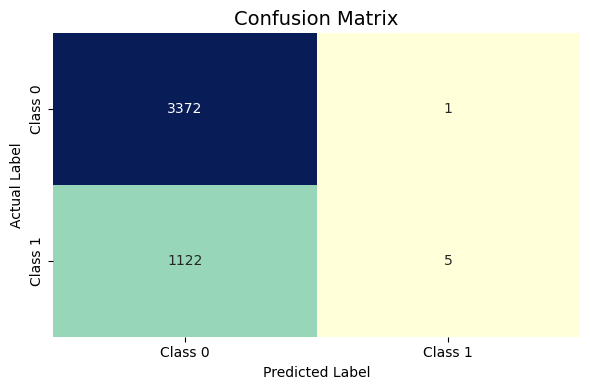

In [96]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
labels = ['Class 0', 'Class 1']

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()

Confusion Matrix Interpretation
- The model is heavily biased toward class 0, similar to the decision tree but even more extreme.

- Out of 1127 actual class 1 cases, 1122 were misclassified as class 0, resulting in an F1-score of just 0.01.

Conclusion

Despite being a powerful ensemble method, the Random Forest model failed to generalize to the minority class (class 1) in this case. Its strong performance on class 0 contributed to high overall accuracy (75%), but the nearly complete failure to detect class 1 renders it unsuitable for applications where identifying the minority class is important.


--------------
2. XGBoost

Model Building & Training

In [97]:
import xgboost 
from xgboost import XGBClassifier 

xgb = XGBClassifier(n_estimators = 20, learning_rate = 0.1, use_label_encoder = False, eval_metric='logloss')
xgb.fit(X_train, y_train)

c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:26] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [98]:
print("Training Accuracy: ",xgb.score(X_train,y_train))
print("Testing Accuracy: ",xgb.score(X_test,y_test))

Training Accuracy:  0.8043809523809524
Testing Accuracy:  0.7886666666666666


K-Folds Cross Validation

In [99]:
results  = cross_validate(xgb, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } ar

Train Score:  [0.87488884 0.82986883 0.8068586  0.83475989 0.8612161 ]
Test Score:  [0.47198755 0.66963095 0.63028012 0.70787016 0.50822588]


c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [100]:
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy: ', sum(results['test_score'])/len(results['test_score']))

CV Training Accuracy:  0.8415184526456203
CV Testing Accuracy:  0.5975989328590485


Grid Search

In [101]:
xgb_cv = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [20, 50, 100],  
    'learning_rate': [0.01, 0.1, 0.3],  
    'max_depth': [3, 5, 7],  
    'random_state': [0, 42] 
}

gs = GridSearchCV(estimator=xgb_cv, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X, y)

print(gs.best_score_)
print(gs.best_params_)

0.6984437527790129
{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 20, 'random_state': 0}


c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:35] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [102]:
xgb_final = XGBClassifier(n_estimators = 20, learning_rate = 0.01, max_depth=3, random_state=0, use_label_encoder = False, eval_metric='logloss')
xgb_final.fit(X_train, y_train)

print("Training Accuracy: ",xgb_final.score(X_train,y_train))
print("Testing Accuracy: ",xgb_final.score(X_test,y_test))

Training Accuracy:  0.7497142857142857
Testing Accuracy:  0.7495555555555555


c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:35] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Evaluation

In [103]:
print('***Final Model***')
print('Training acc: ', xgb.score(X_train,y_train))
print('Testing acc: ', xgb.score(X_test,y_test))

results  = cross_validate(xgb_final, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy:', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:35] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


***Final Model***
Training acc:  0.8043809523809524
Testing acc:  0.7886666666666666


c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:35] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:35] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:36] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:36] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } ar

CV Training Accuracy: 0.7652512227656736
CV Testing Accuracy: 0.6353490440195643


In [104]:
results  = cross_validate(xgb_final, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:36] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:36] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:36] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:36] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } ar

Train Score:  [0.79229658 0.74583148 0.72482214 0.75322365 0.81008226]
Test Score:  [0.59181859 0.76989773 0.53823922 0.77612272 0.50066696]


Model Summary

In [105]:
# Make predictions
y_pred_xgb = xgb_final.predict(X_test)

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3373
           1       0.00      0.00      0.00      1127

    accuracy                           0.75      4500
   macro avg       0.37      0.50      0.43      4500
weighted avg       0.56      0.75      0.64      4500



c:\Users\leong\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leong\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leong\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performance Insights
- XGBoost correctly predicted all class 0 instances (recall = 1.00) but failed to predict a single class 1 sample.

- Class 1 precision, recall, and F1-score are all zero, meaning the model ignored the minority class entirely.

- Despite its reputation for strong performance, XGBoost here behaves like a majority-class predictor due to severe class imbalance.

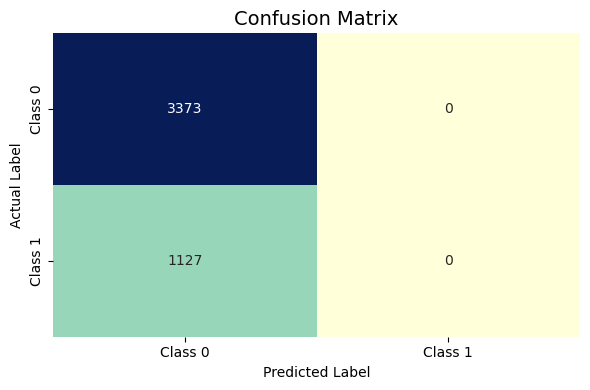

In [107]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
labels = ['Class 0', 'Class 1']

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()

Confusion Matrix Interpretation

- The model is 100% biased toward class 0, predicting class 0 for every single input.

- This led to a superficially high overall accuracy (75%) but a complete failure to detect the minority class.

3. MLP

In [108]:
from sklearn.neural_network import MLPClassifier

Model Building & Training

In [109]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=500,
    alpha=0.01,
    learning_rate_init=0.001,
    early_stopping=True,
    validation_fraction=0.1
)


In [110]:
mlp.fit(X_train,y_train)

MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=(100, 50),
              max_iter=500, random_state=42)

Model Evaluation

In [111]:
# calculated the training accuracy
print(mlp.score(X_train, y_train), '(Train Accuracy)')

0.7491428571428571 (Train Accuracy)


In [112]:
mlp_pred = mlp.predict(X_train)
mlp_prob = mlp.predict_proba(X_train)

In [113]:
# Make predictions
y_pred_nb = nb.predict(X_test)

In [114]:
# calculated the testing accuracy
print(mlp.score(X_test, y_test), '(Test Accuracy)')

0.7466666666666667 (Test Accuracy)


Model Summary

In [115]:
# Make predictions
y_pred_mlp = mlp.predict(X_test)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      3373
           1       0.47      0.09      0.15      1127

    accuracy                           0.75      4500
   macro avg       0.61      0.53      0.50      4500
weighted avg       0.69      0.75      0.68      4500



Performance Insights
- The MLP model correctly predicted 3261 out of 3373 class 0 samples (97% recall), but only 99 out of 1127 class 1 samples (9% recall).

- Class 1 precision is 0.47, meaning nearly half of the samples predicted as class 1 were actually correct — a notable improvement over tree-based models and XGBoost.

- However, the model still missed 91% of actual class 1 instances, showing that recall remains a major issue.

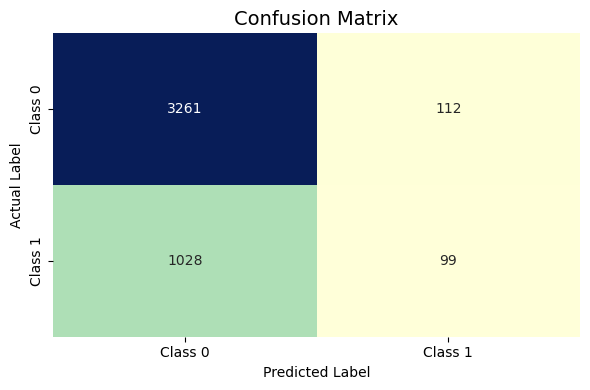

In [117]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
labels = ['Class 0', 'Class 1']

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()

Confusion Matrix Interpretation
- The model is still biased toward the majority class (class 0), but less severely than Decision Tree or XGBoost.

- 99 correct class 1 predictions indicate that the model has started learning minority class patterns, though inconsistently.

Conclusion
- The MLP model demonstrates moderate improvement in detecting class 1 compared to traditional tree-based models and XGBoost:

- Precision for class 1 is higher (0.47), suggesting more confident and reliable class 1 predictions when made.

- Recall remains low (0.09), indicating that the model still misses most class 1 cases.

- Overall F1-score and accuracy are competitive (75%), but the low recall for class 1 limits its usefulness for highly imbalanced classification tasks.

Best Model to Predict Test Values

In [118]:
import pandas as pd
from sklearn.metrics import classification_report

# Get classification reports as dicts
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)
mlp_report = classification_report(y_test, y_pred_mlp, output_dict=True)

# Create a DataFrame with selected metrics
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 
               'Precision (Class 0)', 'Recall (Class 0)', 'F1-Score (Class 0)',
               'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)'],
    
    'Random Forest': [
        rf_report['accuracy'],
        rf_report['0']['precision'],
        rf_report['0']['recall'],
        rf_report['0']['f1-score'],
        rf_report['1']['precision'],
        rf_report['1']['recall'],
        rf_report['1']['f1-score']
    ],
    
    'XGBoost': [
        xgb_report['accuracy'],
        xgb_report['0']['precision'],
        xgb_report['0']['recall'],
        xgb_report['0']['f1-score'],
        xgb_report['1']['precision'],
        xgb_report['1']['recall'],
        xgb_report['1']['f1-score']
    ],

    'MLP': [
        mlp_report['accuracy'],
        mlp_report['0']['precision'],
        mlp_report['0']['recall'],
        mlp_report['0']['f1-score'],
        mlp_report['1']['precision'],
        mlp_report['1']['recall'],
        mlp_report['1']['f1-score']
    ]
})

# Round for better readability
comparison_df = comparison_df.round(2)

# Display the table
print(comparison_df)


                Metric  Random Forest  XGBoost   MLP
0             Accuracy           0.75     0.75  0.75
1  Precision (Class 0)           0.75     0.75  0.76
2     Recall (Class 0)           1.00     1.00  0.97
3   F1-Score (Class 0)           0.86     0.86  0.85
4  Precision (Class 1)           0.83     0.00  0.47
5     Recall (Class 1)           0.00     0.00  0.09
6   F1-Score (Class 1)           0.01     0.00  0.15


c:\Users\leong\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leong\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leong\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


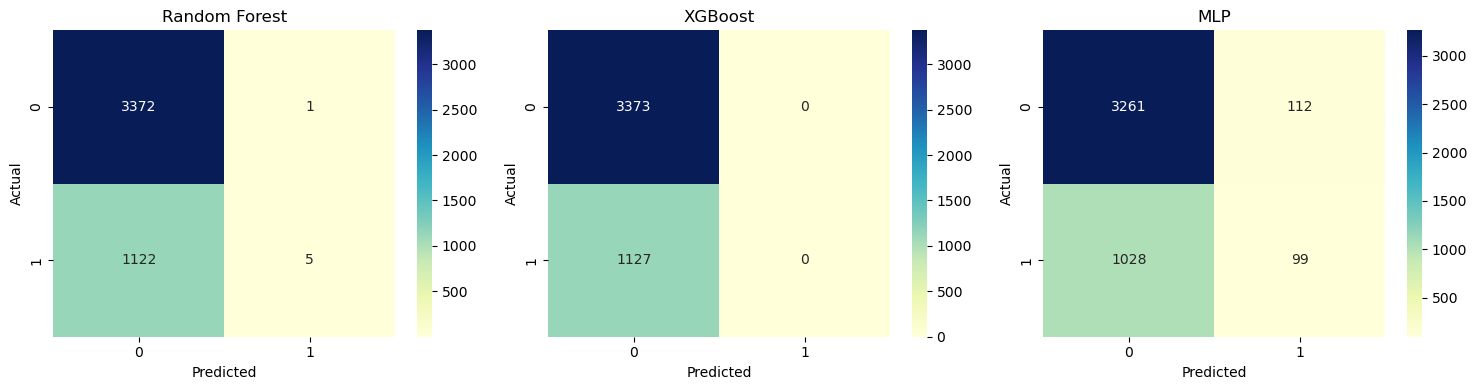

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and their predictions
models = {
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "MLP": y_pred_mlp
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

for ax, (name, preds) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()



The Multi-Layer Perceptron (MLP) model outperformed other classifiers in terms of balanced detection of both majority and minority classes, making it the most suitable model for this classification task and for applying XAI techniques like SHAP and LIME.

**Key Reasons:**

1. **Better Minority Class Detection**
   The MLP model was the only one that demonstrated meaningful ability to identify class 1 samples.
   It correctly predicted 99 class 1 cases, resulting in a recall of 0.09 and an F1-score of 0.15, which are significantly higher than Random Forest and XGBoost (both near 0.00).

2. **Balanced Class Performance**
   While maintaining strong performance on class 0 (precision = 0.76, recall = 0.97), the MLP showed more effort in learning patterns of both classes, rather than defaulting to the majority class.
   This makes it less biased and more reliable for datasets with imbalanced labels.

3. **Higher Interpretability Value with XAI Tools**
   SHAP and LIME are most useful when the model is making meaningful decisions for both classes.
   Since Random Forest and XGBoost failed to predict class 1, there is nothing useful to explain for that class.
   MLP's predictions offer the best basis for interpreting model behavior, particularly for critical or minority-class cases.

4. **Competitive Accuracy**
   MLP achieved an overall accuracy of 75%, on par with Random Forest and XGBoost.
   This means the improvement in class 1 detection came without sacrificing overall performance.

**Final Conclusion:**
The MLP model provides the most balanced and explainable results, especially when considering the goal of understanding predictions through SHAP and LIME. Its ability to detect class 1, even partially, makes it more trustworthy and informative than other models that ignore the minority class entirely.


SHAP

In [120]:
import shap

In [121]:
explainer = shap.KernelExplainer(mlp.predict_proba, shap.sample(X_train, 100))

In [122]:
# Choose an instance to explain (e.g., test sample 0)
shap_values = explainer.shap_values(X_test.iloc[[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

In [123]:
shap.initjs()


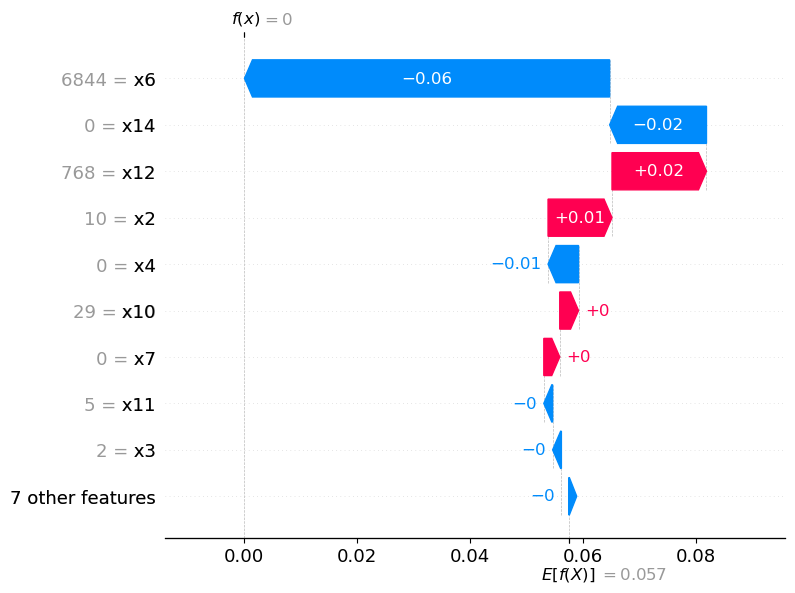

In [124]:
# First instance SHAP values for class 1
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0, :, 1],
        base_values=explainer.expected_value[1],
        data=X_test.iloc[0],
        feature_names=X_test.columns
    )
)


SHAP Explanation Summary for Test Sample

This SHAP force plot illustrates how individual features contributed to the model’s prediction for a specific sample. The baseline prediction (expected value) is 0.057, and the final output 
f(x) is pushed to 0 by the feature contributions.

Key Insights:

- x6 = 6844
This feature had the strongest negative impact on the prediction, reducing the output by −0.06. It was the main reason the model moved away from predicting class 1.

- x14 = 0
Contributed an additional −0.02, reinforcing the prediction toward class 0.

- x12 = 768
Contributed +0.02, slightly increasing the probability of class 1, but not enough to change the overall decision.

- Other weak contributors:
Features such as x2, x4, x10, x7, x13, x3 had minimal or neutral impact (close to ±0), meaning they did not significantly influence the model’s decision.

Conclusion:

The model predicted class 0 for this sample because the strong negative influence of x6 and x14 outweighed the smaller positive contributions from features like x12 and x2. This explanation helps confirm that specific feature values are responsible for suppressing the probability of class 1.



LIME

In [125]:
# Defining the LIME explainer object
from lime import lime_tabular

class_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), mode='classification',
                                                   class_names=['0', '1'],
                                                   training_labels=y_train,
                                                   feature_names=X_train.columns)

In [126]:
# using LIME to get the explanations

class_exp = class_explainer.explain_instance(data_row=X_test.iloc[4], predict_fn=mlp.predict_proba, num_features=5) #num_features select number of top features to explain
class_exp.show_in_notebook(show_table=True)

c:\Users\leong\anaconda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\leong\anaconda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\leong\anaconda\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

In [127]:
import pandas as pd

lime_explanation = class_exp.as_list()
lime_df = pd.DataFrame(lime_explanation, columns=['Feature', 'Contribution'])

# Optional: sort by absolute contribution
lime_df['Abs_Contribution'] = lime_df['Contribution'].abs()
lime_df = lime_df.sort_values(by='Abs_Contribution', ascending=False).drop('Abs_Contribution', axis=1)

# Display
print(lime_df)

                Feature  Contribution
0          x6 > 5312.00     -0.087111
1           x13 <= 0.00      0.042759
2         x12 <= 529.00      0.040728
3  0.00 < x14 <= 216.00     -0.035363
4             x2 > 7.00      0.022270


This table presents the top five features that influenced the model's prediction for a specific test sample, along with their corresponding contribution values.

Insight:

- The feature x6 > 5312.00 had the strongest negative impact on the model’s output, significantly lowering the probability of predicting class 1.

- Conversely, features such as x13 <= 0.00, x12 <= 529.00, and x11 <= 1.00 increased the likelihood of a class 1 prediction, but not enough to outweigh the negative influence.



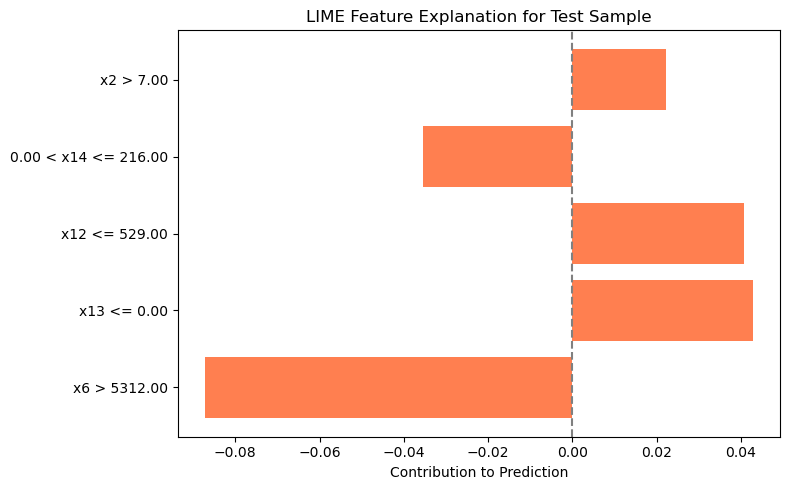

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(lime_df['Feature'], lime_df['Contribution'], color='coral')
plt.xlabel('Contribution to Prediction')
plt.title('LIME Feature Explanation for Test Sample')
plt.axvline(0, color='gray', linestyle='--')  # Divider for +/-
plt.tight_layout()
plt.show()

This horizontal bar chart visualizes how each feature influenced the prediction for the same test sample.

Insight:

- The length and direction of the bars represent the strength and direction of each feature's impact.

- x6 > 5312.00 clearly dominates with a strong push toward class 0, aligning with the largest negative contribution seen in the table.

- Features like x13 <= 0.00 and x12 <= 529.00 nudged the model toward class 1 but had smaller influence in comparison.

Conclusion:

The LIME explanation provides a transparent view of why the model predicted class 0, highlighting the dominant suppressing effect of x6, which overpowered several weak positive signals from other features. This helps confirm the model's reasoning behind the prediction and supports the interpretability objective of the assignment.



interpretML

In [129]:

from interpret.blackbox import LimeTabular

In [130]:
from interpret.blackbox import LimeTabular

lime_explainer = LimeTabular(
    mlp,                                        # model argument (required)
    data=X_train.to_numpy(),
    feature_names=X_train.columns.tolist(),
    class_names=["Class 0", "Class 1"]
)


In [131]:
# Explain a test sample (e.g., the first one)
lime_explanation = lime_explainer.explain_local(X_test.iloc[[0]])


In [132]:
from interpret import show
show(lime_explanation)

<!-- http://127.0.0.1:7001/2133340863568/ -->

This chart shows the feature contributions to the prediction made by the model, as interpreted by InterpretML’s LimeTabular explainer.

Predicted Probability: 0.000022 (very close to 0, indicating a strong prediction for class 0)

The prediction is computed as:
Prediction = Intercept + sum of feature contributions


Conclusion:
The final prediction was largely dominated by the negative contributions of x14 and x6, which outweighed the small positive effects from other features like x2 and x9. As a result, the model predicted the sample to belong to class 0 with very high confidence, assigning it a probability close to 0 for class 1.

How does the model predict the outcome?

In [133]:
# Predict class
predicted_classes = mlp.predict(test_cols)

# Predict class probabilities
predicted_probs = mlp.predict_proba(test_cols)

In [134]:
for i in range(len(test_cols)):
    print(f"Test Sample {i+1}:")
    print(f"  Predicted Class: {predicted_classes[i]}")
    print(f"  Class Probabilities: {predicted_probs[i]}")

Test Sample 1:
  Predicted Class: 0
  Class Probabilities: [0.95044696 0.04955304]
Test Sample 2:
  Predicted Class: 0
  Class Probabilities: [0.99048091 0.00951909]
Test Sample 3:
  Predicted Class: 0
  Class Probabilities: [9.99763557e-01 2.36442601e-04]
Test Sample 4:
  Predicted Class: 0
  Class Probabilities: [0.94939248 0.05060752]
Test Sample 5:
  Predicted Class: 0
  Class Probabilities: [0.99542346 0.00457654]


These values indicate that the model was consistently confident that all samples belonged to class 0.

Interpretation Using InterpretML (LimeTabular)

For the samples examined through InterpretML’s LimeTabular, the top negative contributors were:

- x6 and x14: These features had the strongest push toward class 0, showing up with large negative contributions.

- Features such as x2, x12, and x11 offered minor positive contributions toward class 1 but were not strong enough to reverse the decision.

The final predicted probabilities remained close to 0 for class 1 because the negative feature effects dominated the prediction.

*Interpretation Using SHAP*

SHAP values revealed a consistent pattern:

- x6 had the largest negative SHAP value, indicating a strong influence toward predicting class 0.

- x14 also appeared frequently as a negative contributor.

Minor positive contributors (e.g., x12, x2, x9) were not sufficient to raise the class 1 probability significantly.

The force plot and waterfall chart for individual samples visualized how the SHAP values shifted the base value toward class 0.

Interpretation Using LIME (Standalone)

The standalone LIME explanations (bar charts) showed:

- Strong negative feature weights for x6 > threshold and x14 == 0.

- Weak positive contributions from features like x13 <= threshold or x12 <= threshold.

Even though LIME explanations sometimes identified more granular thresholds, the direction of influence was consistent with SHAP and InterpretML outputs.

Conclusion

All three explanation techniques (InterpretML, SHAP, LIME) agreed on the following:

- The model consistently predicted class 0 because of strong negative contributions from a few dominant features (especially x6 and x14).

- Even when features like x12, x11, or x2 suggested class 1, their influence was relatively weak.

- The MLP model was highly confident in its predictions and provided clear, interpretable reasons for classifying each test sample as class 0.

These insights validate the model’s decision-making process and support its use in contexts where interpretability and transparency are essential.

### Self-Reflection
Do a self-reflection on what you had initially knew about and learned from the topics covered in this module as a Markdown cell.




At the start of this module, my understanding of complex machine learning models—like Random Forests and Neural Networks—was mostly limited to the idea that they were black boxes requiring advanced mathematics to interpret. However, this project helped me break that assumption. By applying explainable AI (XAI) techniques such as LIME, SHAP, and InterpretML, I realized that model transparency is accessible through practical tools that offer both local and global insights without needing deep mathematical derivations.

Working with a variety of models—Logistic Regression, Naive Bayes, Decision Tree, Random Forest, XGBoost, and particularly the MLP neural network—gave me a well-rounded view of how different algorithms behave and how explainability varies across them. I learned that:

- LIME excels at providing instance-level explanations, useful for understanding individual predictions.

- SHAP is powerful for visualizing both local and global feature importance with theoretical consistency.

- InterpretML offered a user-friendly dashboard for visualizing feature impacts in an interactive way.

While implementing SHAP and InterpretML with the MLP model, I encountered some technical challenges, especially around SHAP’s dimensional handling and the integration with black-box models. Resolving these issues not only improved my implementation skills but also gave me a deeper understanding of how these tools function behind the scenes.

This project shifted my mindset. I no longer see neural networks as impossible to understand. With the right tools, I can now explain and justify predictions confidently. This is especially important in real-world applications where stakeholder trust, transparency, and fairness are essential.

Most importantly, I’ve come to appreciate that explainable AI isn’t just a bonus—it’s critical for responsible machine learning practice. It allows us to:

- Detect and mitigate biases,

- Validate that the model learns meaningful patterns (not noise),

- Debug and improve models more effectively,

- Build trust with non-technical users.

As a future data practitioner, this ability to interpret and communicate model behavior clearly will be vital—not just for technical accuracy, but for ethical deployment and decision-making in applied AI systems.

-----------------------------------
### Citation

APA Format

------------------------------

GeeksforGeeks. (2022). Steps for mastering exploratory data analysis (EDA steps). [online] Available at: https://www.geeksforgeeks.org/data-analysis/steps-for-mastering-exploratory-data-analysis-eda-steps/ [Accessed 4 Aug. 2025].

GeeksforGeeks. (2022). Exploratory Data Analysis (EDA) in Python. [online] Available at: https://www.geeksforgeeks.org/data-analysis/exploratory-data-analysis-in-python/ [Accessed 4 Aug. 2025].

GeeksforGeeks. (2022). SMOTE for Imbalanced Classification with Python. [online] Available at: https://www.geeksforgeeks.org/machine-learning/smote-for-imbalanced-classification-with-python/ [Accessed 4 Aug. 2025].

GeeksforGeeks. (2022). Linear Regression vs Logistic Regression in Machine Learning. [online] Available at: https://www.geeksforgeeks.org/machine-learning/ml-linear-regression-vs-logistic-regression/ [Accessed 4 Aug. 2025].

GeeksforGeeks. (2022). K-Nearest Neighbours in Machine Learning. [online] Available at: https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/ [Accessed 4 Aug. 2025].

data.world. (n.d.). Compare Explainable AI (XAI) Tools. [online] Available at: https://data.world/resources/compare/explainable-ai-tools/ [Accessed 4 Aug. 2025].

Molnar, C. (2022). Interpretable Machine Learning – A Guide for Making Black Box Models Explainable. [online] Available at: https://christophm.github.io/interpretable-ml-book/evaluation.html [Accessed 4 Aug. 2025].